**BAKALARSKA_PRACA.ipynb**
## BAKALÁRSKA PRÁCA

# ANALÝZA VYBRANEJ DÁTOVEJ VZORKY NA PREDIKCIU VÝŠKY PRÍJMU

### Michal Jiříček
    # ŠKOLITEĽ: Ing. Anna Biceková, PhD.
    # ROK: 2024/2025
    # UNIVERZITA: Technická univerzita v Košiciach
    # FAKULTA: Fakulta Elektrotechniky a Informatiky
    # ŠTÚDJINÝ ODBOR: Informatika
    # ŠTUDIJNÝ PROGRAM: Hospodárska informatika

`Bakalárska práca sa zaoberá klasifikáciou dát do dvoch binárnych príjmových kategórií s využitím modelov strojového učenia. Zdrojové dáta jednotlivých občanov USA boli extrahované z databázy Census v roku 1994. Teoretická časť práce sa zaoberá príjmovou situáciou v Spojených štátoch a analýzou súčasného stavu. Praktická časť nadväzuje na nadobudnuté poznatky a postupuje pomocou metodológie CRISP-DM. Využitých je 5 modelov strojového učenia: kNN, Náhodný les, Rozhodovací strom, Logistická regresia a Naivný Bayes. Výsledky jednotlivých modelov sú vizuálne zobrazené pomocou ROC kriviek a matíc zámen.`

### ODKAZ NA DOSTUPNÉ DÁTA:
https://archive.ics.uci.edu/dataset/20/census+income

### PÔVODNÝ OBSAH (obsah po stiahnutí z UCI Irvine Machine Learning Repository):

- **adult.data** --> dáta určené na trénovanie
- **adult.names** --> popis datasetu
- **adult.test** --> dáta určené na testovanie 
- **Index** --> zoznam súborov a ich veľkosti
- **old.adult.names** --> starší popis datasetu

*** POCHOPENIE DÁT *** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nazvy atributov datasetu (z popisu datasetu)
nazvy_stlpcov = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# nacitanie suborov
tren_data = pd.read_csv("adult.data", header=None, names=nazvy_stlpcov, skipinitialspace=True)
test_data = pd.read_csv("adult.test", header=1, names=nazvy_stlpcov, skipinitialspace=True)
# skipinitialspace - odstranuje medzery medzi hodnotami

# spojenie suborov do jedneho 
dataset = pd.concat([tren_data, test_data], ignore_index=True)

# ulozenie dat do csv suboru
dataset.to_csv("dataset.csv", index=False)

# nacitanie random hodnot datasetu
print(dataset.sample(10))

# vypisanie typov dat
print(dataset.dtypes)

# zakladne statistiky datasetu
print(dataset.describe())

print("")
print(dataset.sample(5))
print("")

# vypisanie kategorickych a numerickych stlpcov a poctu necistenych dat v treningovom a testovacom datasete a spolu
print("Kategórické atribúty:", dataset.select_dtypes(include=['object']).columns.tolist())
print("")
print("Numerické atribúty:", dataset.select_dtypes(include=['int64']).columns.tolist())
print("")
print("Počet riadkov v tréningovom datasete:", len(tren_data))
print("")
print("Počet riadkov v testovacom datasete:", len(test_data))
print("")
print("Celkový počet riadkov:", len(dataset))

       age         workclass  fnlwgt     education  education-num  \
18954   50         State-gov  133014     Assoc-voc             11   
1397    54  Self-emp-not-inc  114758       Masters             14   
14677   35  Self-emp-not-inc  216256           9th              5   
42640   47  Self-emp-not-inc  199083       Masters             14   
5477    19         State-gov  156294  Some-college             10   
36852   38           Private  218015  Some-college             10   
25376   21           Private  156687  Some-college             10   
15543   59           Private  153484     Bachelors             13   
48675   52           Private  259323       HS-grad              9   
29121   51  Self-emp-not-inc   46401  Some-college             10   

           marital-status        occupation   relationship  \
18954  Married-civ-spouse    Prof-specialty        Husband   
1397   Married-civ-spouse             Sales        Husband   
14677  Married-civ-spouse      Craft-repair        Hus

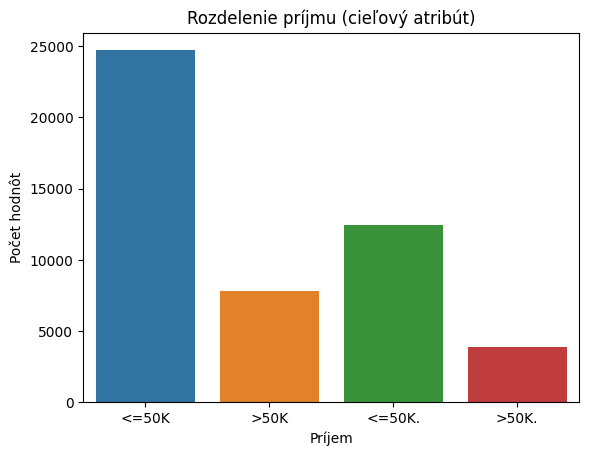

Počet hodnôt v jednotlivých triedach cieľového atribútu:
income
<=50K     24720
<=50K.    12434
>50K       7841
>50K.      3846
Name: count, dtype: int64

Počet riadkov obsahujúcich ?: 3620

Celkový počet výskytov znaku ? vo všetkých stĺpcoch: 6465

Počet výskytu hodnoty ? v jednotlivých atribútoch datasetu:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


In [ ]:
# zobrazenie necistenych dat

# graf - stlpcovy graf cieloveho atributu rozdelenia prijmu a poctu ludi
sns.countplot(x="income", hue = "income",data=dataset)
plt.title("Rozdelenie príjmu (cieľový atribút)")
plt.xlabel("Príjem")
plt.ylabel("Počet hodnôt")
plt.show()

# vypis hodnot pre jednotlive triedy atributu income
triedy_income = dataset["income"].value_counts()
print("Počet hodnôt v jednotlivých triedach cieľového atribútu:")
print(triedy_income)

# pocet riadkov ktore obsahuju aspon jeden ?
# axis 1 → riadok (stlpec → 0)
print("")
print("Počet riadkov obsahujúcich ?:", dataset.isin(["?"]).any(axis=1).sum())


# pocet ? hodnot v riadkoch datasetu
print("")
pocet_otaznik_hodnot_v_stlpcoch = (dataset[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income" ]]== "?").sum()
print("Počet výskytu hodnoty ? v jednotlivých atribútoch datasetu:")
print(pocet_otaznik_hodnot_v_stlpcoch)

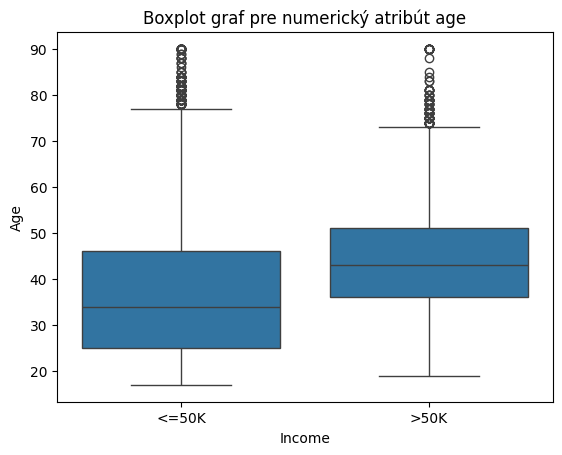

          count       mean        std   min   25%   50%   75%   max
income                                                             
<=50K   37154.0  36.872504  14.104173  17.0  25.0  34.0  46.0  90.0
>50K    11687.0  44.275178  10.558983  19.0  36.0  43.0  51.0  90.0


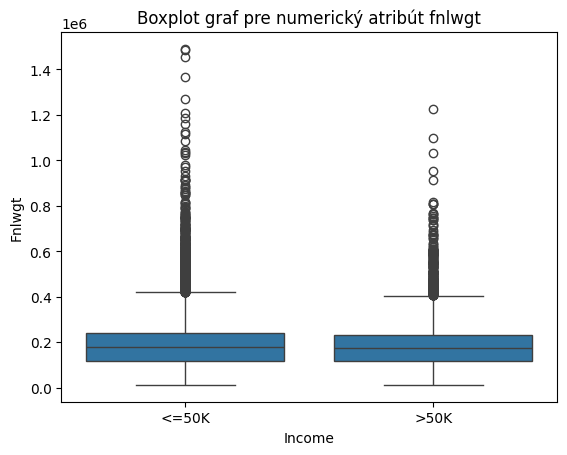

          count           mean            std      min       25%       50%  \
income                                                                       
<=50K   37154.0  190038.576062  106578.868381  12285.0  117210.0  178811.0   
>50K    11687.0  188470.574570  102442.731958  13769.0  118942.5  176729.0   

             75%        max  
income                       
<=50K   238917.0  1490400.0  
>50K    233505.0  1226583.0  


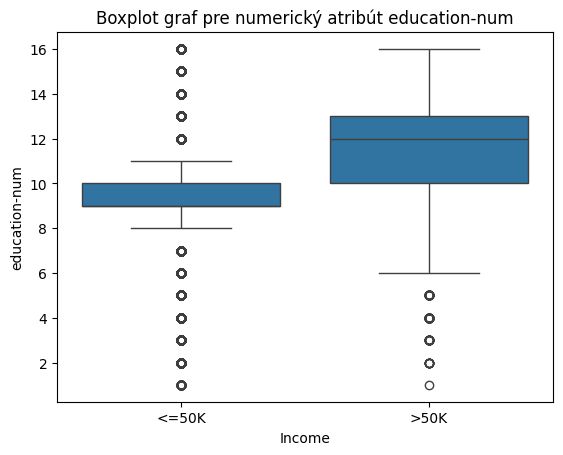

          count       mean       std  min   25%   50%   75%   max
income                                                           
<=50K   37154.0   9.598563  2.437668  1.0   9.0   9.0  10.0  16.0
>50K    11687.0  11.602807  2.382624  1.0  10.0  12.0  13.0  16.0


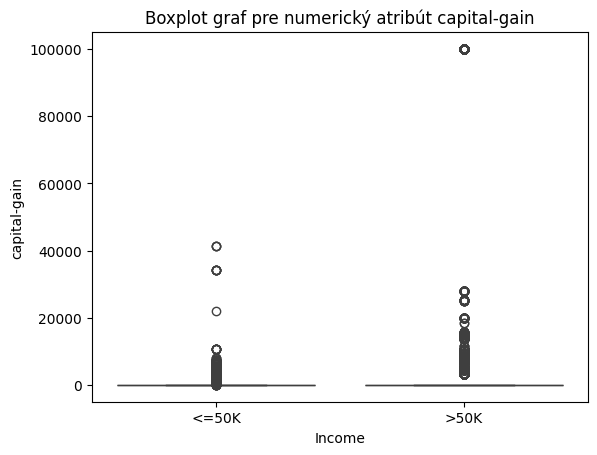

          count         mean           std  min  25%  50%  75%      max
income                                                                 
<=50K   37154.0   147.014265    936.765974  0.0  0.0  0.0  0.0  41310.0
>50K    11687.0  4042.239497  14756.771034  0.0  0.0  0.0  0.0  99999.0


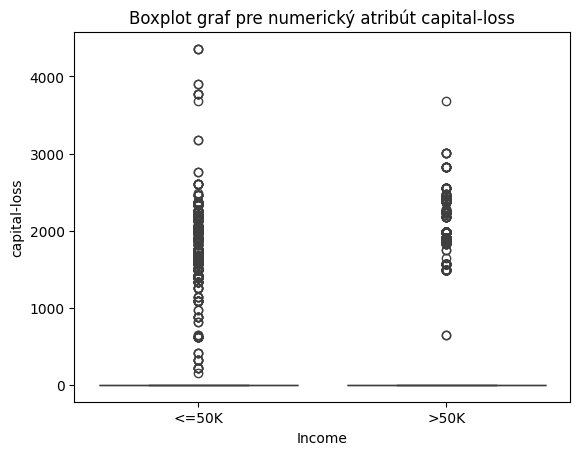

          count        mean         std  min  25%  50%  75%     max
income                                                             
<=50K   37154.0   54.153389  313.324095  0.0  0.0  0.0  0.0  4356.0
>50K    11687.0  193.528964  593.211612  0.0  0.0  0.0  0.0  3683.0


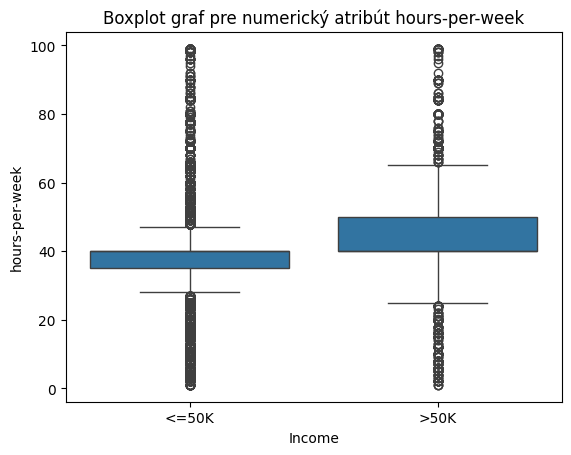

          count       mean        std  min   25%   50%   75%   max
income                                                            
<=50K   37154.0  38.840017  12.357014  1.0  35.0  40.0  40.0  99.0
>50K    11687.0  45.452896  11.091176  1.0  40.0  40.0  50.0  99.0


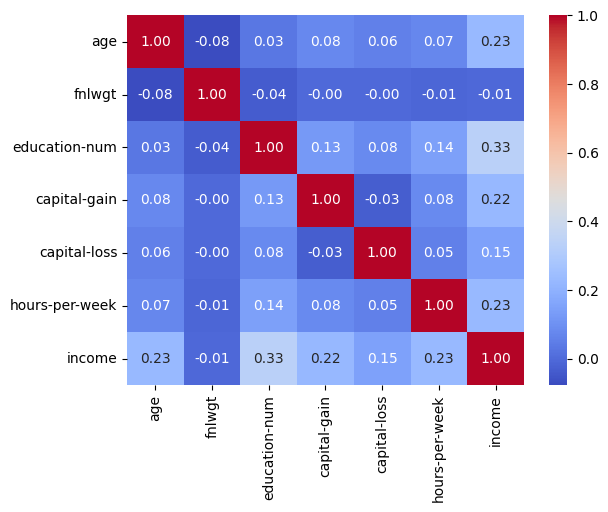

In [ ]:
# vizualizacia numerickych necistenych atributov

# odstranenie bodky v stlpci income pre moznosti vizualizacie neocistenych atributov
dataset["income"] = dataset["income"].str.replace(".", "", regex=False)

# Graf 1 → blokovy graf pre prijem a numericky atribut age
sns.boxplot(data=dataset, x="income", y="age")
plt.title("Boxplot graf pre numerický atribút age")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

# vypocet udajov ku grafu
print(dataset.groupby("income")["age"].describe())

# Graf 2 → blokovy graf pre prijem a numericky atribut fnlwgt
sns.boxplot(data=dataset, x="income", y="fnlwgt")
plt.title("Boxplot graf pre numerický atribút fnlwgt")
plt.xlabel("Income")
plt.ylabel("Fnlwgt")
plt.show()

# vypocet udajov ku grafu
print(dataset.groupby("income")["fnlwgt"].describe())

# Graf 3 → blokovy graf pre prijem a numericky atribut education_num
sns.boxplot(data=dataset, x="income", y="education-num")
plt.title("Boxplot graf pre numerický atribút education-num")
plt.xlabel("Income")
plt.ylabel("education-num")
plt.show()

# vypocet udajov ku grafu
print(dataset.groupby("income")["education-num"].describe())

# Graf 4 → blokovy graf pre prijem a numericky atribut capital_gain
sns.boxplot(data=dataset, x="income", y="capital-gain")
plt.title("Boxplot graf pre numerický atribút capital-gain")
plt.xlabel("Income")
plt.ylabel("capital-gain")
plt.show()

# vypocet udajov ku grafu
print(dataset.groupby("income")["capital-gain"].describe())

# Graf 5 → blokovy graf pre prijem a numericky atribut capital_loss
sns.boxplot(data=dataset, x="income", y="capital-loss")
plt.title("Boxplot graf pre numerický atribút capital-loss")
plt.xlabel("Income")
plt.ylabel("capital-loss")
plt.show()

# vypocet udajov ku grafu
print(dataset.groupby("income")["capital-loss"].describe())

# Graf 6 → blokovy graf pre prijem a numericky atribut hours_per_week
sns.boxplot(data=dataset, x="income", y="hours-per-week")
plt.title("Boxplot graf pre numerický atribút hours-per-week")
plt.xlabel("Income")
plt.ylabel("hours-per-week")
plt.show()

# vypocet udajov ku grafu
print(dataset.groupby("income")["hours-per-week"].describe())

# korelacna matica numerickych atributov
korelacne_stlpce = dataset[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"] + ["income"]]
korelacne_stlpce = korelacne_stlpce.copy()
korelacne_stlpce["income"] = korelacne_stlpce["income"].map({">50K": 1, "<=50K": 0})
korelacna_matica = korelacne_stlpce.corr()
sns.heatmap(korelacna_matica, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# najviac korelovane atributy s cielovym atributom su: 
# age, education_num, capital_gain, hours_per_week

Hodnoty v kategorickom stlpci: workclass
25865             Private
6389              Private
43434    Self-emp-not-inc
4215                    ?
44663             Private
Name: workclass, dtype: object
Hodnoty v kategorickom stlpci: education
37219         Masters
35438         HS-grad
17406             9th
31078    Some-college
29313       Bachelors
Name: education, dtype: object
Hodnoty v kategorickom stlpci: marital-status
21276    Married-civ-spouse
20873    Married-civ-spouse
33792         Never-married
23776         Never-married
434           Never-married
Name: marital-status, dtype: object
Hodnoty v kategorickom stlpci: occupation
1709     Exec-managerial
7841     Exec-managerial
11255       Craft-repair
17107     Prof-specialty
48345    Exec-managerial
Name: occupation, dtype: object
Hodnoty v kategorickom stlpci: relationship
44900    Not-in-family
15930    Not-in-family
42813          Husband
30709    Not-in-family
8389     Not-in-family
Name: relationship, dtype: object
Ho

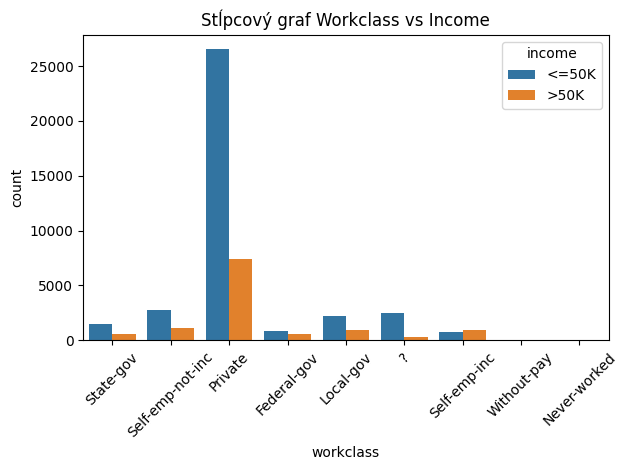

Unikatne hodnoty v stĺpci: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Počet unikátnych hodnôt v stĺpci: 9


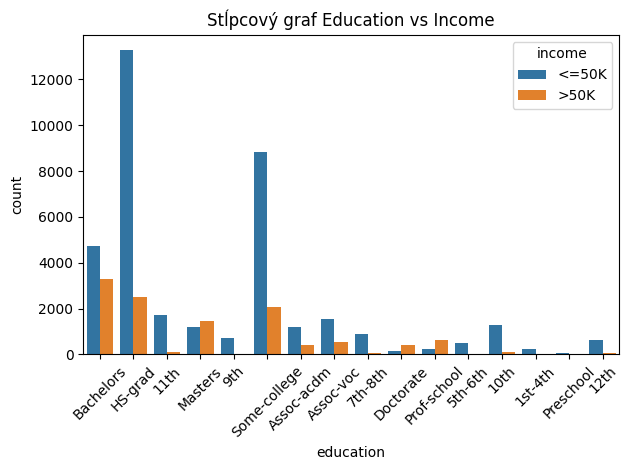

Unikatne hodnoty v stĺpci: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Počet unikátnych hodnôt v stĺpci: 16


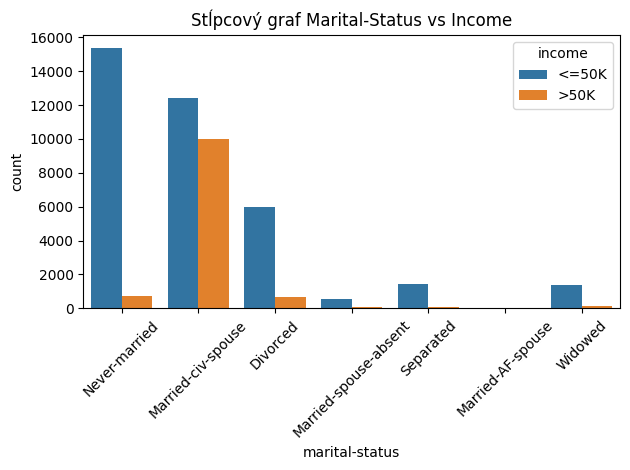

Unikatne hodnoty v stĺpci: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Počet unikátnych hodnôt v stĺpci: 7


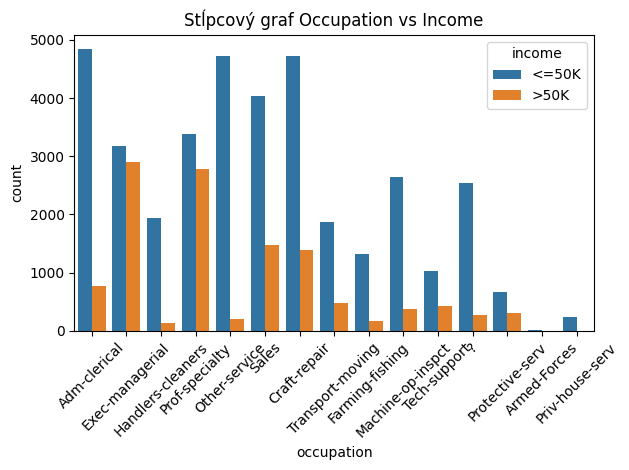

Unikatne hodnoty v stĺpci: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Počet unikátnych hodnôt v stĺpci: 15


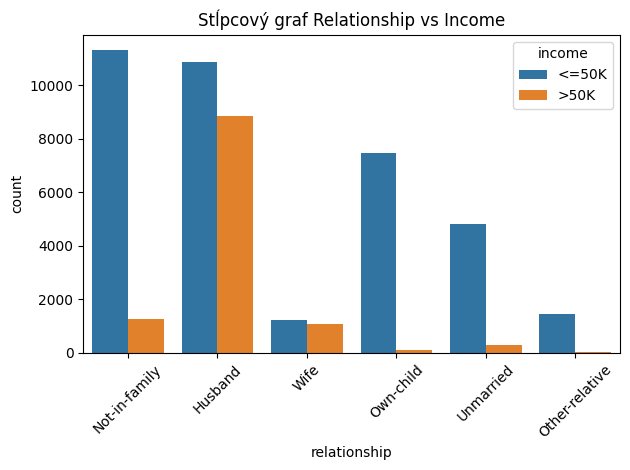

Unikatne hodnoty v stĺpci: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Počet unikátnych hodnôt v stĺpci: 6


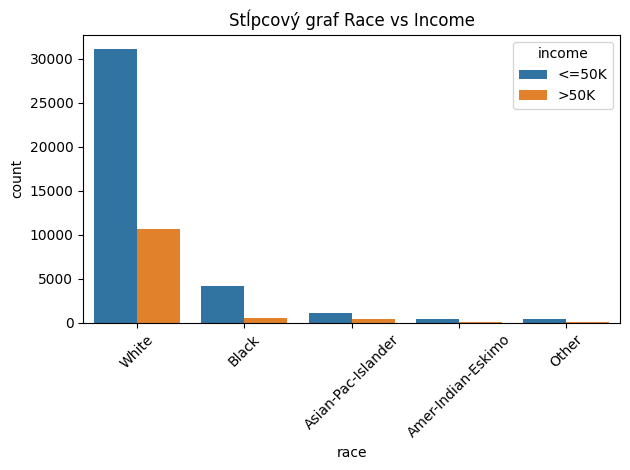

Unikatne hodnoty v stĺpci: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Počet unikátnych hodnôt v stĺpci: 5


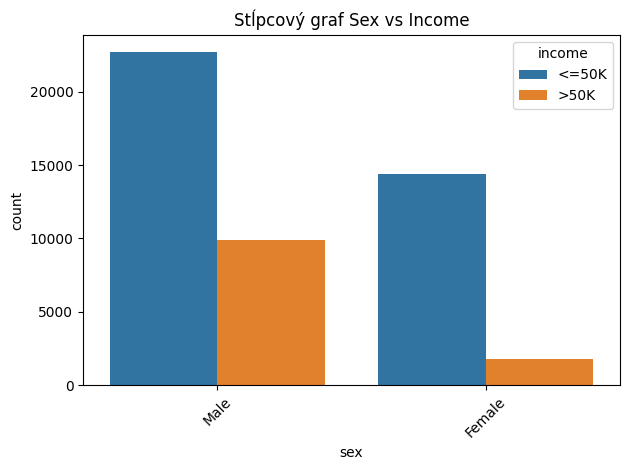

Unikatne hodnoty v stĺpci: ['Male' 'Female']
Počet unikátnych hodnôt v stĺpci: 2


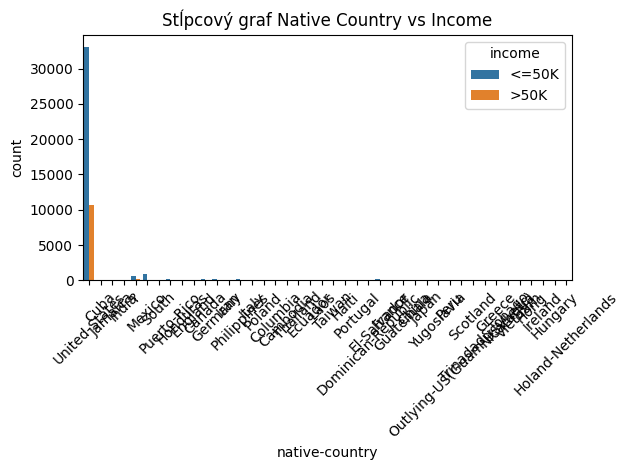

Unikatne hodnoty v stĺpci: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
Počet unikátnych hodnôt v stĺpci: 42


In [ ]:
# kategoricke necistene atributy

kategoricke_stlpce = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

# vypis hodnot kategoricke_stlpce
for stlpec in kategoricke_stlpce:
    print("Hodnoty v kategorickom stlpci:",stlpec)
    print(dataset[stlpec].sample(5))

# graf 1 → kategoricky atribut worclass v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="workclass", hue="income")
plt.title("Stĺpcový graf Workclass vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# vypis jednotlivych kategorii / tried v kategorikych atributoch
print("Unikatne hodnoty v stĺpci:",dataset.workclass.unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset.workclass.nunique())

# graf 2 → kategoricky atribut education v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="education", hue="income")
plt.title("Stĺpcový graf Education vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unikatne hodnoty v stĺpci:",dataset.education.unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset.education.nunique())

# graf 3 → kategoricky atribut marital_status v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="marital-status", hue="income")
plt.title("Stĺpcový graf Marital-Status vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unikatne hodnoty v stĺpci:",dataset["marital-status"].unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset["marital-status"].nunique())

# graf 4 → kategoricky atribut occupation v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="occupation", hue="income")
plt.title("Stĺpcový graf Occupation vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unikatne hodnoty v stĺpci:",dataset.occupation.unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset["occupation"].nunique())

# graf 5 → kategoricky atribut relationship v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="relationship", hue="income")
plt.title("Stĺpcový graf Relationship vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unikatne hodnoty v stĺpci:",dataset.relationship.unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset['relationship'].nunique())

# graf 6 → kategoricky atribut race v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="race", hue="income")
plt.title("Stĺpcový graf Race vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unikatne hodnoty v stĺpci:",dataset.race.unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset["race"].nunique())

# graf 7 → kategoricky atribut sex v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="sex", hue="income")
plt.title("Stĺpcový graf Sex vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unikatne hodnoty v stĺpci:",dataset.sex.unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset["sex"].nunique())

# graf 8 → kategoricky atribut native_country v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="native-country", hue="income")
plt.title("Stĺpcový graf Native Country vs Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unikatne hodnoty v stĺpci:",dataset["native-country"].unique())
print("Počet unikátnych hodnôt v stĺpci:",dataset['native-country'].nunique())

*** PRÍPRAVA DÁT *** 

In [ ]:
# cistenie dat 

# celkovy pocet necistenych riadkov
print("Celkový počet nečistených riadkov:", len(dataset))

# vypis hodnot pre jednotlive triedy atributu income
triedy_income = dataset["income"].value_counts()
print("Počet hodnôt v jednotlivých triedach cieľového atribútu:")
print(triedy_income)

# nahradenie ? → nan (prazdna hodnota)
dataset = dataset.replace("?", np.nan)

# odstranenie prazdnych hodnot
dataset = dataset.dropna()

# celkovy pocet riadkov po vymazani ?
print("Celkový počet riadkov po odstránení riadkov s ?:", len(dataset))

# pocet riadkov ktore obsahuju aspon jeden → ?
print("Počet riadkov obsahujúcich ?:", dataset.isin(["?"]).any(axis=1).sum())

# nahradenie - v stlpcoch na _
dataset.columns = dataset.columns.str.replace("-", "_")

#vypisanie nazvov stlpcov
print(dataset.columns)

# vypisanie celkoveho poctu dat (riadkov) - cistenych
print("Celkový počet riadkov po očistení:", len(dataset))

# zobrazenie stlpcov datasetu a ich kratky vypis
for stlpec in dataset.columns:
    print("Stĺpec:", stlpec)
    print(dataset[stlpec].sample(5))

Celkový počet nečistených riadkov: 48841
Počet hodnôt v jednotlivých triedach cieľového atribútu:
income
<=50K    37154
>50K     11687
Name: count, dtype: int64
Celkový počet riadkov po odstránení riadkov s ?: 45221
Počet riadkov obsahujúcich ?: 0
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
Celkový počet riadkov po očistení: 45221
Stĺpec: age
35495    49
43014    27
24230    51
35996    23
46160    52
Name: age, dtype: int64
Stĺpec: workclass
27493             Private
23996             Private
31570             Private
43545             Private
28264    Self-emp-not-inc
Name: workclass, dtype: object
Stĺpec: fnlwgt
19352    259109
32739    248010
2361     256000
9078     433669
14174    209131
Name: fnlwgt, dtype: int64
Stĺpec: education
19977         HS-grad
20956       Bachelors


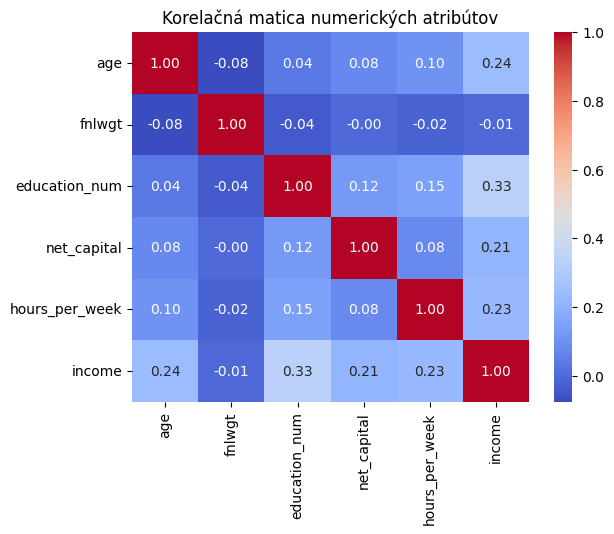

In [128]:
# vytvorenie net_capital a odstranenie capital_gain a capital_loss
dataset["net_capital"] = dataset["capital_gain"] - dataset["capital_loss"]
dataset = dataset.drop(["capital_gain", "capital_loss"], axis=1)

# korelacna matica numerickych atributov
korelacne_stlpce = dataset[["age", "fnlwgt", "education_num", "net_capital", "hours_per_week"]+["income"]]
korelacne_stlpce = korelacne_stlpce.copy()
korelacne_stlpce["income"] = korelacne_stlpce["income"].map({">50K": 1, "<=50K": 0})
korelacna_matica = korelacne_stlpce.corr()
sns.heatmap(korelacna_matica, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korelačná matica numerických atribútov')
plt.show()

# najviac korelovane atributy s cielovym atributom su: 
# age, education_num, net_capital, hours_per_week

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalizacia numerickych atributov
scaler = MinMaxScaler()  
numericke_atributy = ["age","fnlwgt", "education_num", "net_capital", "hours_per_week"]
dataset[numericke_atributy] = scaler.fit_transform(dataset[numericke_atributy])

# vypis hodnot normalizovanych stlpcov
for stlpec in numericke_atributy:
    print("Normalizované hodnoty v stĺpci:", stlpec)
    print(dataset[stlpec].head())

Normalizované hodnoty v stĺpci: age
0    0.301370
1    0.452055
2    0.287671
3    0.493151
4    0.150685
Name: age, dtype: float64
Normalizované hodnoty v stĺpci: fnlwgt
0    0.043350
1    0.047274
2    0.136877
3    0.149792
4    0.219998
Name: fnlwgt, dtype: float64
Normalizované hodnoty v stĺpci: education_num
0    0.800000
1    0.800000
2    0.533333
3    0.400000
4    0.800000
Name: education_num, dtype: float64
Normalizované hodnoty v stĺpci: net_capital
0    0.062575
1    0.041742
2    0.041742
3    0.041742
4    0.041742
Name: net_capital, dtype: float64
Normalizované hodnoty v stĺpci: hours_per_week
0    0.397959
1    0.122449
2    0.397959
3    0.397959
4    0.397959
Name: hours_per_week, dtype: float64


0
21
Hodnoty v kategorickom stlpci: workclass
42460    Private-sector
20138    Private-sector
19018    Private-sector
31648    Private-sector
48457    Private-sector
Name: workclass, dtype: object
Hodnoty v kategorickom stlpci: education
10572         High-school
12691         High-school
42213    Higher-education
29660    Higher-education
28645    Higher-education
Name: education, dtype: object
Hodnoty v kategorickom stlpci: marital_status
6863     Never-married
37866    Never-married
34904    Never-married
24140          Married
35157         Divorced
Name: marital_status, dtype: object
Hodnoty v kategorickom stlpci: occupation
48655    Office-work
35806    Office-work
630      Office-work
39478    Expert-work
9156     Office-work
Name: occupation, dtype: object
Hodnoty v kategorickom stlpci: relationship
11843    Own-child
47199    Unmarried
9965          Wife
13336      Husband
23867      Husband
Name: relationship, dtype: object
Hodnoty v kategorickom stlpci: race
14443    White
3

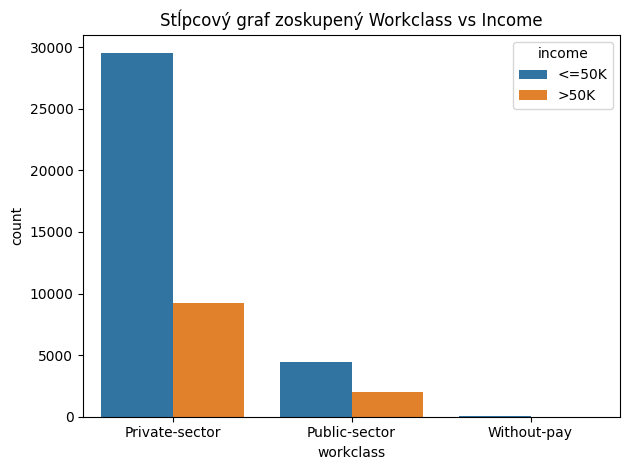

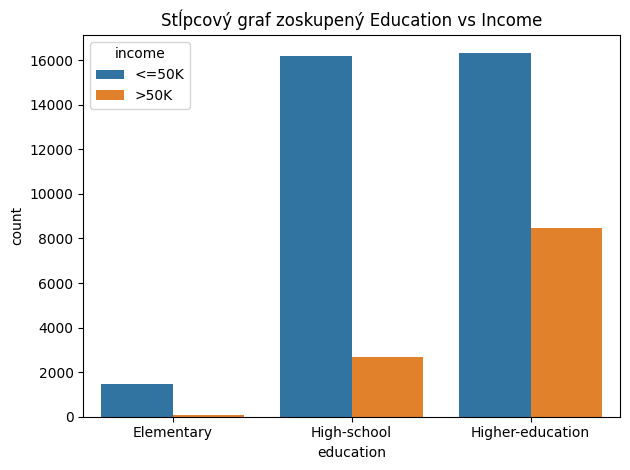

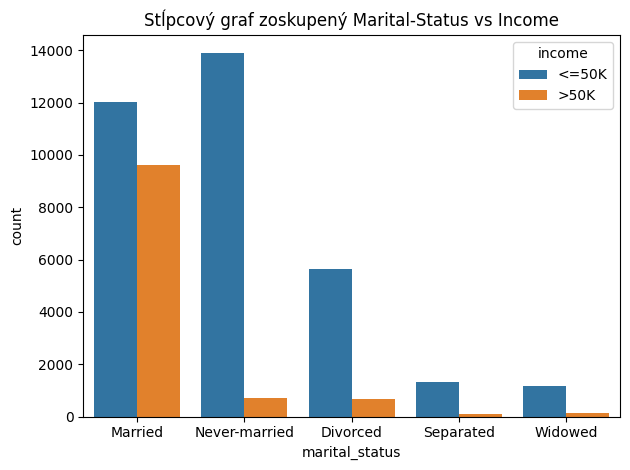

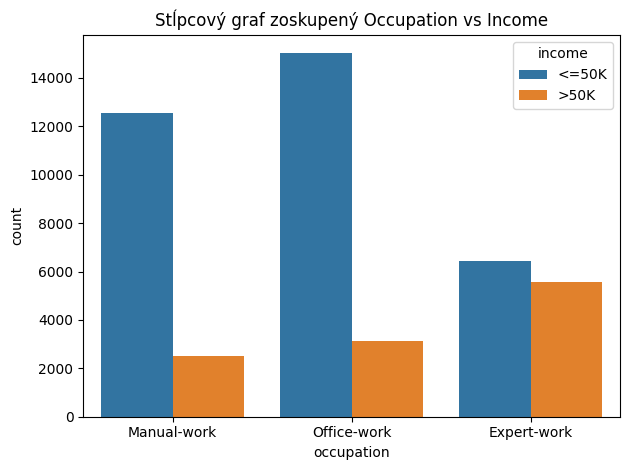

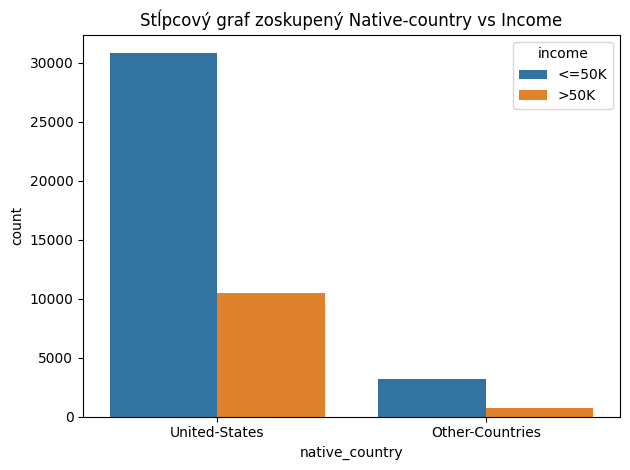

In [130]:
# zoskupovanie tried kategorickych atributov

# prieskum poctu hodnot atribut workclass
print((dataset["workclass"] == "Never-worked").sum()) # kontrola kategoria never-worked nemusi byt zoskupovana, vsetci respondenti niekedy v zivote pracovali
print((dataset["workclass"] == "Without-pay").sum())

# zoskupenie kategorii pre atribut workclass
def rozdelenie_workclass(prac_trieda):
    if prac_trieda in ["Self-emp-not-inc","Private","Self-emp-inc"]:
        return "Private-sector"
    if prac_trieda in ["State-gov","Federal-gov", "Local-gov"]:
        return  "Public-sector"
    if prac_trieda in ["Without-pay"]:
        return "Without-pay"
dataset["workclass"] = dataset["workclass"].apply(rozdelenie_workclass)
workclass_usporiadanie = ["Private-sector","Public-sector","Without-pay"]

# zoskupenie kategorii pre atribut education
def rozdelenie_education(educat):
    if educat in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
        return "Elementary"
    if educat in ["9th", "10th", "11th", "12th", "HS-grad"]:
        return "High-school"
    if educat in ["Some-college","Assoc-acdm","Assoc-voc","Bachelors","Masters","Doctorate","Prof-school"]:
        return "Higher-education"
dataset["education"] = dataset["education"].apply(rozdelenie_education)
education_usporiadanie = ["Elementary", "High-school", "Higher-education"]

# zoskupenie kategorii pre atribut marital_status
def rozdelenie_marital_status(status):
    if status in ["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"]:
        return "Married"
    if status in ["Never-married"]:
        return "Never-married"
    if status in ["Divorced"]:
        return "Divorced"
    if status in ["Separated"]:
        return "Separated"
    if status in ["Widowed"]:
        return "Widowed"
dataset["marital_status"] = dataset["marital_status"].apply(rozdelenie_marital_status)
marital_status_usporiadanie = ["Married", "Never-married","Divorced","Separated","Widowed"]

# zoskupenie kategorii pre atribut occupation
def rozdelenie_occupation(occup):
    if occup in ["Handlers-cleaners", "Farming-fishing","Machine-op-inspct","Craft-repair","Transport-moving","Priv-house-serv"]:
        return "Manual-work" # manualna praca
    if occup in ["Adm-clerical", "Tech-support", "Sales","Other-service","Protective-serv"]:
        return "Office-work" # administrativa a sluzby
    if occup in ["Exec-managerial","Prof-specialty","Armed-Forces"]:
        return "Expert-work"
dataset["occupation"] = dataset["occupation"].apply(rozdelenie_occupation)
occupation_usporiadanie = ["Manual-work", "Office-work", "Expert-work"]

# zoskupovanie pre atributy relationship, race a sex nevykonavame
# relationship (6 kategorii/tried) - - → Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative
# race (5 kategorii/tried) - - → White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other
# sex (2 kategorie/triedy) - - → Male, Female

# zoskupenie kategorii pre atribut native_country
def rozdelenie_native_country(country):
    if country in ["United-States"]:
        return "United-States"
    if country not in ["United-States"]:
        return "Other-Countries"
dataset["native_country"] = dataset["native_country"].apply(rozdelenie_native_country)
native_country_usporiadanie = ["United-States", "Other-Countries"]

kategoricke_stlpce = dataset[["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]]

# vypis hodnot kategoricke_stlpce
for stlpec in kategoricke_stlpce:
    print("Hodnoty v kategorickom stlpci:",stlpec)
    print(dataset[stlpec].sample(5))
    
# graf 1 → zoskupeny kategoricky atribut worclass v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="workclass", hue="income", order=workclass_usporiadanie)
plt.title("Stĺpcový graf zoskupený Workclass vs Income")
plt.tight_layout()
plt.show()

# graf 2 → zoskupeny kategoricky atribut education v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="education", hue="income", order=education_usporiadanie)
plt.title("Stĺpcový graf zoskupený Education vs Income")
plt.tight_layout()
plt.show()

# graf 3 → zoskupeny kategoricky atribut marital_status v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="marital_status", hue="income", order = marital_status_usporiadanie)
plt.title("Stĺpcový graf zoskupený Marital-Status vs Income")
plt.tight_layout()
plt.show()

# graf 4 → zoskupeny kategoricky atribut occupation v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="occupation", hue="income", order=occupation_usporiadanie)
plt.title("Stĺpcový graf zoskupený Occupation vs Income")
plt.tight_layout()
plt.show()

# relationship, race, sex - - → grafy pre tieto atributy nevykreslujeme kedze sme v nich nevykonavali zmeny

# graf 5 → zoskupeny kategoricky atribut native_country v zavislosti od cieloveho atributu income
sns.countplot(data=dataset, x="native_country", hue="income", order=native_country_usporiadanie)
plt.title("Stĺpcový graf zoskupený Native-country vs Income")
plt.tight_layout()
plt.show()

In [ ]:
# encoding a spojenie dat 

from sklearn.preprocessing import LabelEncoder

# label encoding pre workclass, marital_status, sex
label_encoder_workclass = LabelEncoder()
dataset["workclass_encoded"] = label_encoder_workclass.fit_transform(dataset["workclass"]) # vytvori sa workclass_encoded
label_encoder_education = LabelEncoder()
dataset["education_encoded"] = label_encoder_education.fit_transform(dataset["education"])
label_encoder_marital_status = LabelEncoder()
dataset["marital_status_encoded"] = label_encoder_marital_status.fit_transform(dataset["marital_status"])
label_encoder_occupation = LabelEncoder()
dataset["occupation_encoded"] = label_encoder_occupation.fit_transform(dataset["occupation"])
label_encoder_relationship = LabelEncoder()
dataset["relationship_encoded"] = label_encoder_relationship.fit_transform(dataset["relationship"])
label_encoder_race = LabelEncoder()
dataset["race_encoded"] = label_encoder_race.fit_transform(dataset["race"])
label_encoder_sex = LabelEncoder()
dataset["sex_encoded"] = label_encoder_sex.fit_transform(dataset["sex"])
label_encoder_native_country = LabelEncoder()
dataset["native_country_encoded"] = label_encoder_native_country.fit_transform(dataset["native_country"])

# prevod cieloveho kategorickeho atributu na numericky
dataset["income"] = dataset["income"].map({">50K": 1, "<=50K": 0})

# vymazanie starych kategorickych stlpcov kategorickeho typu (kategoricke stlpce, numerickeho typu po Label encodingu ostavaju)
dataset = dataset.drop(kategoricke_stlpce, axis=1)

# ulozenie datasetu 
dataset.to_csv("dataset.csv", index=False) 

# vytvorenie kopie pre modely pre ktore su vhodne numericke atributy numerickeho typu
numericky_dataset = dataset.copy()

# dropnutie starych kategorickych atributov
numericke_kategoricke_stlpce = dataset[["workclass_encoded", "education_encoded", "marital_status_encoded", "occupation_encoded", "relationship_encoded", "race_encoded", "sex_encoded", "native_country_encoded"]]
numericky_dataset = numericky_dataset.drop(numericke_kategoricke_stlpce, axis=1)

# ulozenie dat do noveho suboru - mozna kontrola ci dataset obsahuje vsetko co chcem
numericky_dataset.to_csv("numericky_dataset.csv", index=False)

print("***dataset*** obsahuje:")
print(dataset)
print("")
print("***numericky dataset*** obsahuje:")
print(numericky_dataset)

***dataset*** obsahuje:
            age    fnlwgt  education_num  hours_per_week  income  net_capital  \
0      0.301370  0.043350       0.800000        0.397959       0     0.062575   
1      0.452055  0.047274       0.800000        0.122449       0     0.041742   
2      0.287671  0.136877       0.533333        0.397959       0     0.041742   
3      0.493151  0.149792       0.400000        0.397959       0     0.041742   
4      0.150685  0.219998       0.800000        0.397959       0     0.041742   
...         ...       ...            ...             ...     ...          ...   
48835  0.219178  0.156895       0.800000        0.397959       0     0.041742   
48836  0.301370  0.136723       0.800000        0.357143       0     0.041742   
48838  0.287671  0.244762       0.800000        0.500000       0     0.041742   
48839  0.369863  0.047666       0.800000        0.397959       0     0.094016   
48840  0.246575  0.114195       0.800000        0.602041       1     0.041742   

   

In [132]:
# na spojenych datach data.csv sme ukazali celkovy postup, ktory je potrebne aplikovat na adult.data (trenovacie_data) a adult.test (testovacie_data)

# ulozenie dat do csv suborov
trenovacie_data = pd.read_csv("adult.data", header=None, names=nazvy_stlpcov, skipinitialspace=True)
testovacie_data = pd.read_csv("adult.test", header=1, names=nazvy_stlpcov, skipinitialspace=True)

# nacitanie random hodnot datasetu
print(trenovacie_data.sample(10))
print(testovacie_data.sample(10))

# vypisanie typov dat
print(trenovacie_data.dtypes)
print(testovacie_data.dtypes)

# zakladne statistiky datasetu
print(trenovacie_data.describe())
print(testovacie_data.describe())

       age     workclass  fnlwgt     education  education-num  \
23532   24       Private  116968     Bachelors             13   
29679   20       Private  190772    Assoc-acdm             12   
7177    38       Private  101978  Some-college             10   
2629    54       Private  182854       HS-grad              9   
32112   32  Self-emp-inc  209691     Bachelors             13   
19583   27     Local-gov  162973     Assoc-voc             11   
17192   18       Private   95917       HS-grad              9   
32524   26       Private  191648    Assoc-acdm             12   
21352   28       Private  163265           9th              5   
5839    48       Private   96359     Bachelors             13   

           marital-status         occupation    relationship   race     sex  \
23532       Never-married    Exec-managerial   Not-in-family  White    Male   
29679       Never-married      Other-service   Not-in-family  White  Female   
7177            Separated  Machine-op-inspct   

Celkový počet riadkov pred očistením: 32561
Počet riadkov obsahujúcich ? v trénovacích dátach: 2399
Počet riadkov obsahujúcich ?: 0
Celkový počet riadkov po očistení: 30162


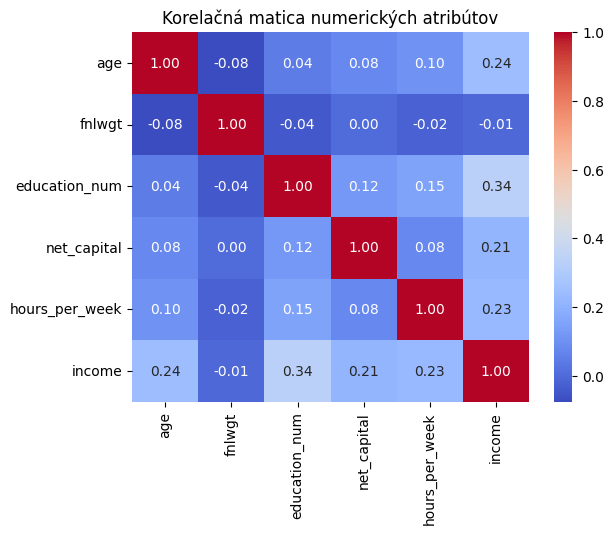

In [133]:
# zaciname postupom pre trenovacie_data.csv
# postup tu je analyticky rovnaky ako na celkovych datach, no teraz je aplikovany na trenovacie data

print("Celkový počet riadkov pred očistením:", len(trenovacie_data))
print("Počet riadkov obsahujúcich ? v trénovacích dátach:", trenovacie_data.isin(["?"]).any(axis=1).sum())
trenovacie_data["income"] = trenovacie_data['income'].str.replace(".", "", regex=False)
trenovacie_data = trenovacie_data.replace("?", np.nan).dropna()
print("Počet riadkov obsahujúcich ?:", trenovacie_data.isin(["?"]).any(axis=1).sum())
trenovacie_data.columns = trenovacie_data.columns.str.replace("-", "_")
print("Celkový počet riadkov po očistení:", len(trenovacie_data))
trenovacie_data["net_capital"] = trenovacie_data["capital_gain"] - trenovacie_data["capital_loss"]
trenovacie_data = trenovacie_data.drop(["capital_gain", "capital_loss"], axis=1)
korelacne_stlpce = trenovacie_data[["age", "fnlwgt", "education_num", "net_capital", "hours_per_week"]+["income"]]
korelacne_stlpce = korelacne_stlpce.copy()
korelacne_stlpce["income"] = korelacne_stlpce["income"].map({">50K": 1, "<=50K": 0})
korelacna_matica = korelacne_stlpce.corr()
sns.heatmap(korelacna_matica, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korelačná matica numerických atribútov')
plt.show()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
numericke_atributy = ["age","fnlwgt", "education_num", "net_capital", "hours_per_week"]
trenovacie_data[numericke_atributy] = scaler.fit_transform(trenovacie_data[numericke_atributy])
def rozdelenie_workclass(prac_trieda):
    if prac_trieda in ["Self-emp-not-inc","Private","Self-emp-inc"]:
        return "Private-sector"
    if prac_trieda in ["State-gov","Federal-gov", "Local-gov"]:
        return  "Public-sector"
    if prac_trieda in ["Without-pay"]:
        return "Without-pay"
trenovacie_data["workclass"] = trenovacie_data["workclass"].apply(rozdelenie_workclass)
workclass_usporiadanie = ["Private-sector","Public-sector","Without-pay"]
def rozdelenie_education(educat):
    if educat in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
        return "Elementary"
    if educat in ["9th", "10th", "11th", "12th", "HS-grad"]:
        return "High-school"
    if educat in ["Some-college","Assoc-acdm","Assoc-voc","Bachelors","Masters","Doctorate","Prof-school"]:
        return "Higher-education"
trenovacie_data["education"] = trenovacie_data["education"].apply(rozdelenie_education)
education_usporiadanie = ["Elementary", "High-school", "Higher-education"]
def rozdelenie_marital_status(status):
    if status in ["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"]:
        return "Married"
    if status in ["Never-married"]:
        return "Never-married"
    if status in ["Divorced"]:
        return "Divorced"
    if status in ["Separated"]:
        return "Separated"
    if status in ["Widowed"]:
        return "Widowed"
trenovacie_data["marital_status"] = trenovacie_data["marital_status"].apply(rozdelenie_marital_status)
marital_status_usporiadanie = ["Married", "Never-married","Divorced","Separated","Widowed"]
def rozdelenie_occupation(occup):
    if occup in ["Handlers-cleaners", "Farming-fishing","Machine-op-inspct","Craft-repair","Transport-moving","Priv-house-serv"]:
        return "Manual-work" 
    if occup in ["Adm-clerical", "Tech-support", "Sales","Other-service","Protective-serv"]:
        return "Office-work" 
    if occup in ["Exec-managerial","Prof-specialty","Armed-Forces"]:
        return "Expert-work"
trenovacie_data["occupation"] = trenovacie_data["occupation"].apply(rozdelenie_occupation)
occupation_usporiadanie = ["Manual-work", "Office-work", "Expert-work"]
def rozdelenie_native_country(country):
    if country in ["United-States"]:
        return "United-States"
    if country not in ["United-States"]:
        return "Other-Countries"
trenovacie_data["native_country"] = trenovacie_data["native_country"].apply(rozdelenie_native_country)
native_country_usporiadanie = ["United-States", "Other-Countries"]
kategoricke_stlpce = trenovacie_data[["workclass", "education", "marital_status", "occupation", "relationship", "race","sex", "native_country"]]
label_encoder_workclass = LabelEncoder()
trenovacie_data["workclass_encoded"] = label_encoder_workclass.fit_transform(trenovacie_data["workclass"]) 
label_encoder_education = LabelEncoder()
trenovacie_data["education_encoded"] = label_encoder_education.fit_transform(trenovacie_data["education"])
label_encoder_marital_status = LabelEncoder()
trenovacie_data["marital_status_encoded"] = label_encoder_marital_status.fit_transform(trenovacie_data["marital_status"])
label_encoder_occupation = LabelEncoder()
trenovacie_data["occupation_encoded"] = label_encoder_occupation.fit_transform(trenovacie_data["occupation"])
label_encoder_relationship = LabelEncoder()
trenovacie_data["relationship_encoded"] = label_encoder_relationship.fit_transform(trenovacie_data["relationship"])
label_encoder_race = LabelEncoder()
trenovacie_data["race_encoded"] = label_encoder_race.fit_transform(trenovacie_data["race"])
label_encoder_sex = LabelEncoder()
trenovacie_data["sex_encoded"] = label_encoder_sex.fit_transform(trenovacie_data["sex"])
label_encoder_native_country = LabelEncoder()
trenovacie_data["native_country_encoded"] = label_encoder_native_country.fit_transform(trenovacie_data["native_country"])
trenovacie_data["income"] = trenovacie_data["income"].map({">50K": 1, "<=50K": 0})
trenovacie_data = trenovacie_data.drop(kategoricke_stlpce, axis=1)
trenovacie_data.to_csv("trenovacie_data.csv", index=False) 
numericke_trenovacie_data = trenovacie_data.copy()
numericke_kategoricke_stlpce = numericke_trenovacie_data[["workclass_encoded", "education_encoded", "marital_status_encoded", "occupation_encoded", "relationship_encoded", "race_encoded", "sex_encoded", "native_country_encoded"]]
numericke_trenovacie_data = numericke_trenovacie_data.drop(numericke_kategoricke_stlpce, axis=1)
numericke_trenovacie_data.to_csv("numericke_trenovacie_data.csv", index=False)

Celkový počet riadkov pred očistením: 16280
Počet riadkov obsahujúcich ? v testovacích dátach: 1221
Počet riadkov obsahujúcich ?: 0
Celkový počet riadkov po očistení: 15059


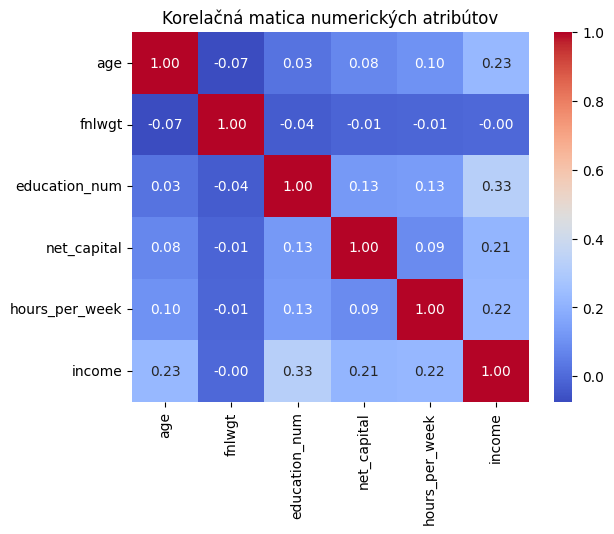

In [134]:
# pokracujem rovnakym postupom pre testovacie_data.csv
# postup tu je uplne rovnaky ako na celkovych datach, no teraz je aplikovany na testovacie data

print("Celkový počet riadkov pred očistením:", len(testovacie_data))
print("Počet riadkov obsahujúcich ? v testovacích dátach:", testovacie_data.isin(["?"]).any(axis=1).sum())
testovacie_data["income"] = testovacie_data['income'].str.replace(".", "", regex=False)
testovacie_data = testovacie_data.replace("?", np.nan).dropna()
print("Počet riadkov obsahujúcich ?:", testovacie_data.isin(["?"]).any(axis=1).sum())
testovacie_data.columns = testovacie_data.columns.str.replace("-", "_")
print("Celkový počet riadkov po očistení:", len(testovacie_data))
testovacie_data["net_capital"] = testovacie_data["capital_gain"] - testovacie_data["capital_loss"]
testovacie_data = testovacie_data.drop(["capital_gain", "capital_loss"], axis=1)
korelacne_stlpce = testovacie_data[["age", "fnlwgt", "education_num", "net_capital", "hours_per_week"]+["income"]]
korelacne_stlpce = korelacne_stlpce.copy()
korelacne_stlpce["income"] = korelacne_stlpce["income"].map({">50K": 1, "<=50K": 0})
korelacna_matica = korelacne_stlpce.corr()
sns.heatmap(korelacna_matica, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korelačná matica numerických atribútov')
plt.show()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
numericke_atributy = ["age","fnlwgt", "education_num", "net_capital", "hours_per_week"]
testovacie_data[numericke_atributy] = scaler.fit_transform(testovacie_data[numericke_atributy])
def rozdelenie_workclass(prac_trieda):
    if prac_trieda in ["Self-emp-not-inc","Private","Self-emp-inc"]:
        return "Private-sector"
    if prac_trieda in ["State-gov","Federal-gov", "Local-gov"]:
        return  "Public-sector"
    if prac_trieda in ["Without-pay"]:
        return "Without-pay"
testovacie_data["workclass"] = testovacie_data["workclass"].apply(rozdelenie_workclass)
workclass_usporiadanie = ["Private-sector","Public-sector","Without-pay"]
def rozdelenie_education(educat):
    if educat in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
        return "Elementary"
    if educat in ["9th", "10th", "11th", "12th", "HS-grad"]:
        return "High-school"
    if educat in ["Some-college","Assoc-acdm","Assoc-voc","Bachelors","Masters","Doctorate","Prof-school"]:
        return "Higher-education"
testovacie_data["education"] = testovacie_data["education"].apply(rozdelenie_education)
education_usporiadanie = ["Elementary", "High-school", "Higher-education"]
def rozdelenie_marital_status(status):
    if status in ["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"]:
        return "Married"
    if status in ["Never-married"]:
        return "Never-married"
    if status in ["Divorced"]:
        return "Divorced"
    if status in ["Separated"]:
        return "Separated"
    if status in ["Widowed"]:
        return "Widowed"
testovacie_data["marital_status"] = testovacie_data["marital_status"].apply(rozdelenie_marital_status)
marital_status_usporiadanie = ["Married", "Never-married","Divorced","Separated","Widowed"]
def rozdelenie_occupation(occup):
    if occup in ["Handlers-cleaners", "Farming-fishing","Machine-op-inspct","Craft-repair","Transport-moving","Priv-house-serv"]:
        return "Manual-work" 
    if occup in ["Adm-clerical", "Tech-support", "Sales","Other-service","Protective-serv"]:
        return "Office-work" 
    if occup in ["Exec-managerial","Prof-specialty","Armed-Forces"]:
        return "Expert-work"
testovacie_data["occupation"] = testovacie_data["occupation"].apply(rozdelenie_occupation)
occupation_usporiadanie = ["Manual-work", "Office-work", "Expert-work"]
def rozdelenie_native_country(country):
    if country in ["United-States"]:
        return "United-States"
    if country not in ["United-States"]:
        return "Other-Countries"
testovacie_data["native_country"] = testovacie_data["native_country"].apply(rozdelenie_native_country)
native_country_usporiadanie = ["United-States", "Other-Countries"]
kategoricke_stlpce = testovacie_data[["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]]
label_encoder_workclass = LabelEncoder()
testovacie_data["workclass_encoded"] = label_encoder_workclass.fit_transform(testovacie_data["workclass"]) 
label_encoder_education = LabelEncoder()
testovacie_data["education_encoded"] = label_encoder_education.fit_transform(testovacie_data["education"])
label_encoder_marital_status = LabelEncoder()
testovacie_data["marital_status_encoded"] = label_encoder_marital_status.fit_transform(testovacie_data["marital_status"])
label_encoder_occupation = LabelEncoder()
testovacie_data["occupation_encoded"] = label_encoder_occupation.fit_transform(testovacie_data["occupation"])
label_encoder_relationship = LabelEncoder()
testovacie_data["relationship_encoded"] = label_encoder_relationship.fit_transform(testovacie_data["relationship"])
label_encoder_race = LabelEncoder()
testovacie_data["race_encoded"] = label_encoder_race.fit_transform(testovacie_data["race"])
label_encoder_sex = LabelEncoder()
testovacie_data["sex_encoded"] = label_encoder_sex.fit_transform(testovacie_data["sex"])
label_encoder_native_country = LabelEncoder()
testovacie_data["native_country_encoded"] = label_encoder_native_country.fit_transform(testovacie_data["native_country"])
testovacie_data["income"] = testovacie_data["income"].map({">50K": 1, "<=50K": 0})
testovacie_data = testovacie_data.drop(kategoricke_stlpce, axis=1)
testovacie_data.to_csv("testovacie_data.csv", index=False) 
numericke_testovacie_data = testovacie_data.copy()
numericke_kategoricke_stlpce = numericke_testovacie_data[["workclass_encoded", "education_encoded", "marital_status_encoded", "occupation_encoded", "relationship_encoded", "race_encoded", "sex_encoded", "native_country_encoded"]]
numericke_testovacie_data = numericke_testovacie_data.drop(numericke_kategoricke_stlpce, axis=1)
numericke_testovacie_data.to_csv("numericke_testovacie_data.csv", index=False)

*** MODELOVANIE A VYHODNOTENIE *** 

In [ ]:
# modely strojoveho ucenia 

from sklearn.model_selection import train_test_split

# rozdelenia dat na vstupne a vystupne atributy - urcene pre modely KNN, NAHODNY LES, ROZHODOVACI STROM 
X_train = trenovacie_data.drop(["income"], axis=1) # axis = 1 - stlpec
y_train = trenovacie_data["income"]

X_test = testovacie_data.drop(["income"], axis=1)
y_test = testovacie_data["income"]

# kontrola poctu atributov v jednotlivych mnozinach 
print(X_train.shape[1])
print(X_train.columns)
print(X_test.shape[1])
print(X_test.columns)

# rozdelenia dat na vstupne a vystupne atributy - urcene pre modely LOGISTICKA REGRESIA, NAIVNY BAYES
X_train_n = numericke_trenovacie_data.drop(["income"], axis=1) # n - numericke
y_train_n = numericke_trenovacie_data["income"]

X_test_n = numericke_testovacie_data.drop(["income"], axis=1) 
y_test_n = numericke_testovacie_data["income"]

# kontrola poctu atributov v jednotlivych mnozinach 
print(X_train_n.shape[1])
print(X_train_n.columns)
print(X_test_n.shape[1])
print(X_test_n.columns)

13
Index(['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital',
       'workclass_encoded', 'education_encoded', 'marital_status_encoded',
       'occupation_encoded', 'relationship_encoded', 'race_encoded',
       'sex_encoded', 'native_country_encoded'],
      dtype='object')
13
Index(['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital',
       'workclass_encoded', 'education_encoded', 'marital_status_encoded',
       'occupation_encoded', 'relationship_encoded', 'race_encoded',
       'sex_encoded', 'native_country_encoded'],
      dtype='object')
5
Index(['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital'], dtype='object')
5
Index(['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital'], dtype='object')


*** MODEL KNN ***
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     11359
           1       0.65      0.55      0.60      3700

    accuracy                           0.82     15059
   macro avg       0.76      0.73      0.74     15059
weighted avg       0.81      0.82      0.81     15059



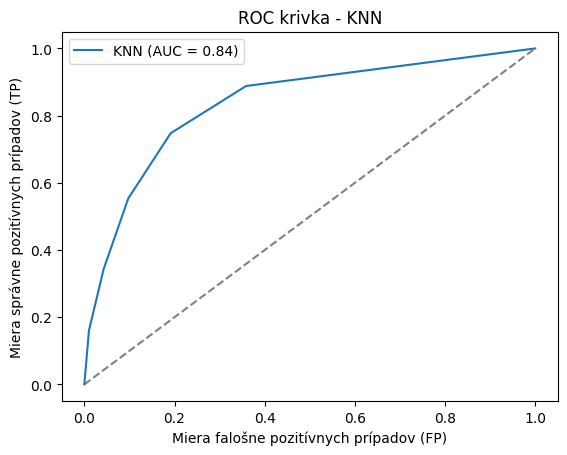

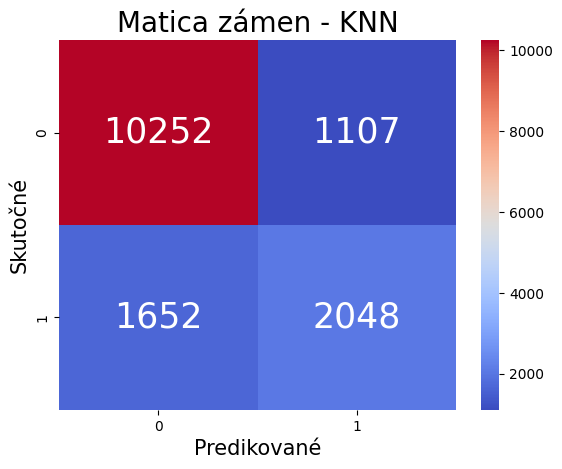

In [ ]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn import metrics

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predikt_knn = knn.predict(X_test)

print("*** MODEL KNN ***")
print(classification_report(y_test, predikt_knn))

# KNN ROC krivka
knn_pravdepodobnost_triedy = knn.predict_proba(X_test)[:, 1] # [:, 1] → nad 50k
knn_nespravne_pozitivne, knn_spravne_pozitivne, _ = roc_curve(y_test, knn_pravdepodobnost_triedy)
auc_skore_knn = metrics.auc(knn_nespravne_pozitivne, knn_spravne_pozitivne)

plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=knn_nespravne_pozitivne, y=knn_spravne_pozitivne, label="KNN (AUC = " + str(round(auc_skore_knn, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - KNN")
plt.show()

# KNN Matica zamen
matrix_knn = confusion_matrix(y_test, predikt_knn)
sns.heatmap(matrix_knn, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25}) # d - cele cisla (integer, decimal)
plt.title("Matica zámen - KNN", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

MODEL NÁHODNÝ LES
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11359
           1       0.70      0.59      0.64      3700

    accuracy                           0.84     15059
   macro avg       0.79      0.76      0.77     15059
weighted avg       0.83      0.84      0.83     15059



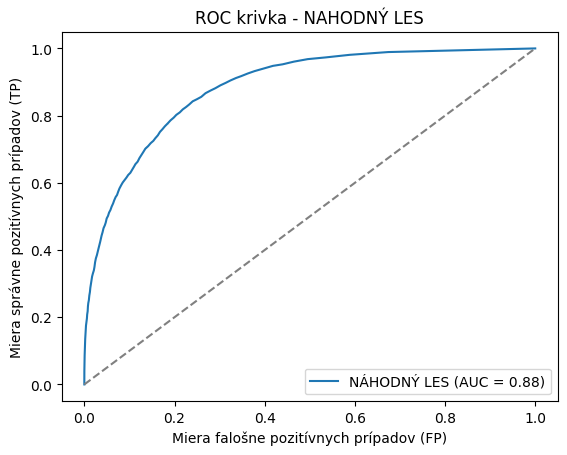

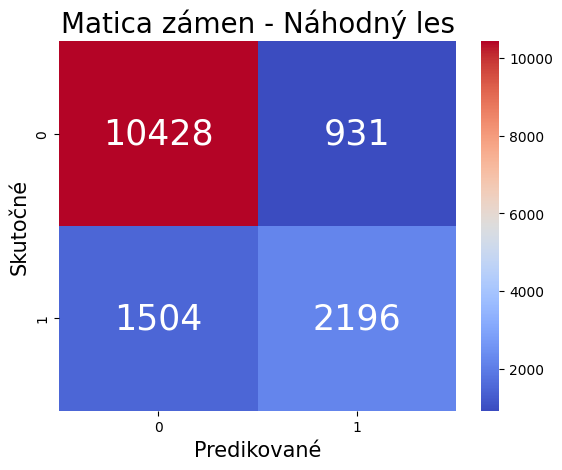

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# NAHODNY LES model
rf = RandomForestClassifier(random_state=42) 
rf.fit(X_train, y_train)
predikt_rf = rf.predict(X_test)
print("MODEL NÁHODNÝ LES")
print(classification_report(y_test, predikt_rf))

# NAHODNY LES ROC krivka
rf_pravdepodobnost_triedy = rf.predict_proba(X_test)[:, 1]
rf_nespravne_pozitivne, rf_spravne_pozitivne, _ = roc_curve(y_test, rf_pravdepodobnost_triedy)
auc_skore_rf = metrics.auc(rf_nespravne_pozitivne, rf_spravne_pozitivne)
plt.figure()
sns.lineplot(x=rf_nespravne_pozitivne, y=rf_spravne_pozitivne, label="NÁHODNÝ LES (AUC = " +str(round(auc_skore_rf, 2))+")")
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--" )
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - NAHODNÝ LES")
plt.show()

# NAHODNY LES Matica zamen
matrix_rf = confusion_matrix(y_test, predikt_rf)
sns.heatmap(matrix_rf, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - Náhodný les", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

MODEL ROZHODOVACÍ STROM
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     11359
           1       0.57      0.60      0.58      3700

    accuracy                           0.79     15059
   macro avg       0.72      0.72      0.72     15059
weighted avg       0.79      0.79      0.79     15059



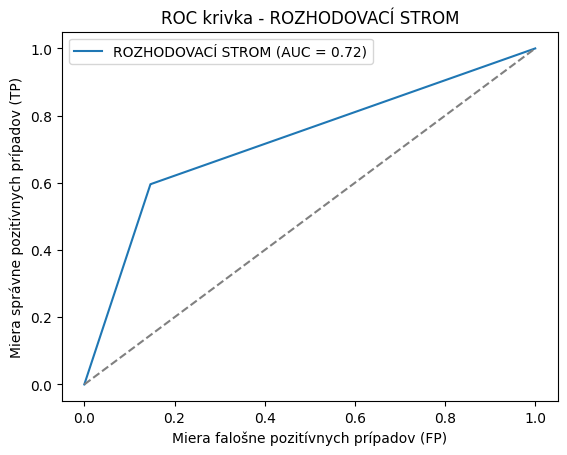

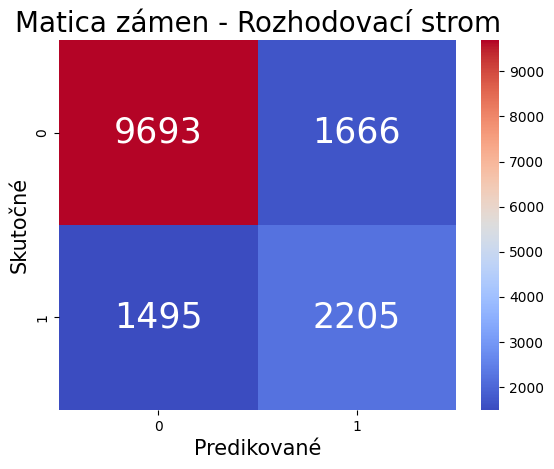

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree


# ROZHODOVACI STROM model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
predikt_dt = dt.predict(X_test)
print("MODEL ROZHODOVACÍ STROM")
print(classification_report(y_test, predikt_dt))

# ROZHODOVACI STROM ROC krivka
dt_pravdepodobnost_triedy = dt.predict_proba(X_test)[:, 1]
dt_nespravne_pozitivne, dt_spravne_pozitivne, _ = roc_curve(y_test, dt_pravdepodobnost_triedy)
auc_skore_dt = metrics.auc(dt_nespravne_pozitivne, dt_spravne_pozitivne)
plt.figure()
sns.lineplot(x=dt_nespravne_pozitivne, y=dt_spravne_pozitivne, label= "ROZHODOVACÍ STROM (AUC = " +str(round(auc_skore_dt, 2))+")")
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - ROZHODOVACÍ STROM")
plt.show()

# ROZHODOVACI STROM Matica zamen
matrix_dt = confusion_matrix(y_test, predikt_dt)
sns.heatmap(matrix_dt, annot=True, cmap="coolwarm", fmt="d", annot_kws={"size" : 25})
plt.title("Matica zámen - Rozhodovací strom", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

*** MODEL LOGISTICKÁ REGRESIA ***
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11359
           1       0.68      0.34      0.45      3700

    accuracy                           0.80     15059
   macro avg       0.75      0.64      0.66     15059
weighted avg       0.78      0.80      0.77     15059



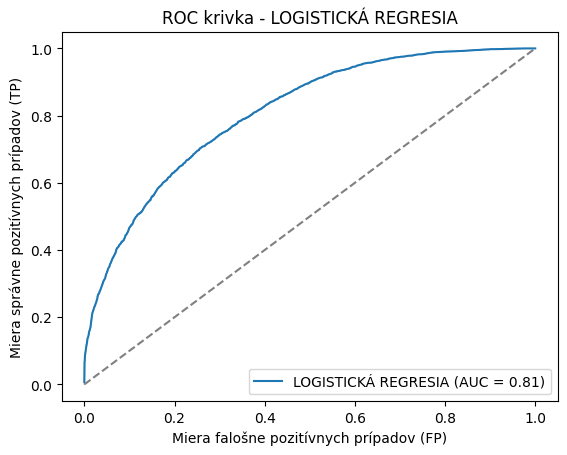

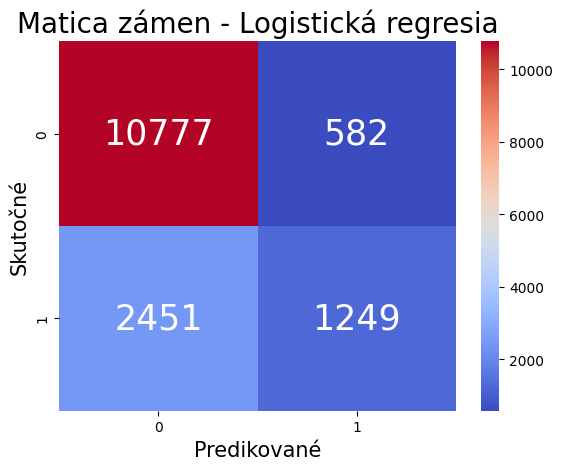

In [ ]:
from sklearn.linear_model import LogisticRegression

# LOGISTICKA REGRESIA model
lr = LogisticRegression() # max_iter = 100 - default hodnota z scikit.learn # max_iter=100
lr.fit(X_train_n, y_train_n)
predikt_lr = lr.predict(X_test_n)

print("*** MODEL LOGISTICKÁ REGRESIA ***")
print(classification_report(y_test_n, predikt_lr))

# LOGISTICKA REGRESIA ROC krivka
lr_pravdepodobnost_triedy = lr.predict_proba(X_test_n)[:, 1]
lr_nespravne_pozitivne, lr_spravne_pozitivne, _ = roc_curve(y_test_n, lr_pravdepodobnost_triedy)
auc_skore_lr = metrics.auc(lr_nespravne_pozitivne, lr_spravne_pozitivne)
plt.figure()
sns.lineplot(x=lr_nespravne_pozitivne, y=lr_spravne_pozitivne, label="LOGISTICKÁ REGRESIA (AUC = " + str(round(auc_skore_lr, 2)) + ")")
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - LOGISTICKÁ REGRESIA")
plt.show()

# LOGISTICKA REGRESIA Matica zamen
matrix_lr = confusion_matrix(y_test_n, predikt_lr)
sns.heatmap(matrix_lr, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - Logistická regresia", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

*** MODEL NAIVNÝ BAYES ***
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11359
           1       0.77      0.26      0.39      3700

    accuracy                           0.80     15059
   macro avg       0.79      0.62      0.64     15059
weighted avg       0.79      0.80      0.76     15059



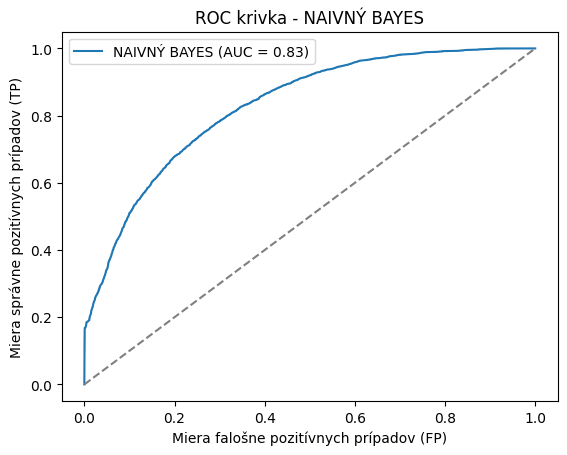

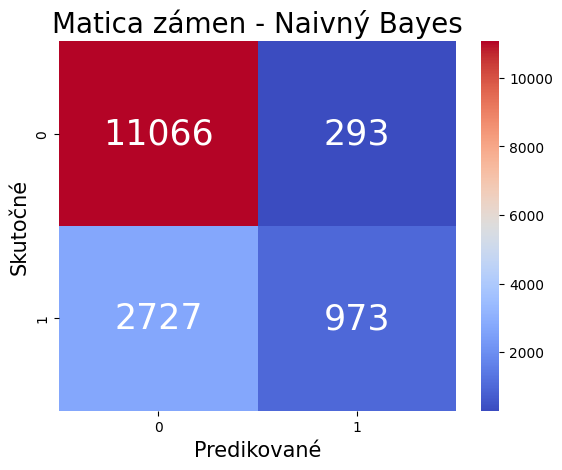

In [ ]:
from sklearn.naive_bayes import GaussianNB

# NAIVNY BAYES model
nb = GaussianNB()
nb.fit(X_train_n, y_train_n)
predikt_nb = nb.predict(X_test_n)

print("*** MODEL NAIVNÝ BAYES ***")
print(classification_report(y_test_n, predikt_nb))

# NAIVNY BAYES ROC krivka
nb_pravdepodobnost_triedy = nb.predict_proba(X_test_n)[:, 1]
nb_nespravne_pozitivne, nb_spravne_pozitivne, _ = roc_curve(y_test_n, nb_pravdepodobnost_triedy)
auc_skore_nb = metrics.auc(nb_nespravne_pozitivne, nb_spravne_pozitivne)
plt.figure()
sns.lineplot(x=nb_nespravne_pozitivne, y=nb_spravne_pozitivne, label="NAIVNÝ BAYES (AUC = " + str(round(auc_skore_nb, 2))+")")
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - NAIVNÝ BAYES")
plt.show()

# NAIVNY BAYES Matica zamen
matrix_nb = confusion_matrix(y_test_n, predikt_nb)
sns.heatmap(matrix_nb, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - Naivný Bayes", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

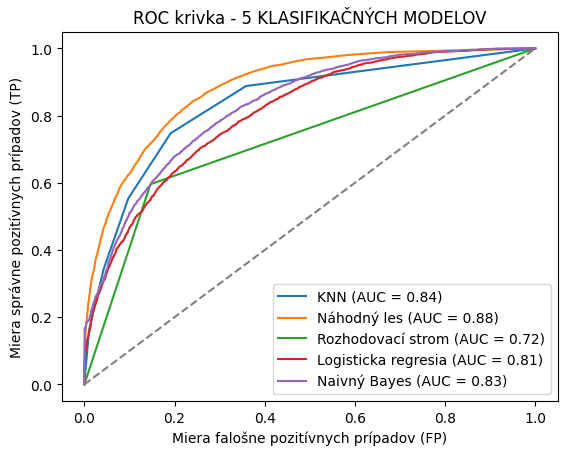

In [141]:
# MODELY SPOLU ROC krivka

# plt.figure(figsize=(10, 8))

sns.lineplot(x=knn_nespravne_pozitivne, y=knn_spravne_pozitivne, label="KNN (AUC = " + str(round(auc_skore_knn, 2)) + ")")

sns.lineplot(x=rf_nespravne_pozitivne, y=rf_spravne_pozitivne, label="Náhodný les (AUC = " +str(round(auc_skore_rf, 2))+")")

sns.lineplot(x=dt_nespravne_pozitivne, y=dt_spravne_pozitivne, label= "Rozhodovací strom (AUC = " +str(round(auc_skore_dt, 2))+")")

sns.lineplot(x=lr_nespravne_pozitivne, y=lr_spravne_pozitivne, label="Logisticka regresia (AUC = " + str(round(auc_skore_lr, 2)) + ")")

sns.lineplot(x=nb_nespravne_pozitivne, y=nb_spravne_pozitivne, label="Naivný Bayes (AUC = " + str(round(auc_skore_nb, 2))+")")

sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")

plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - 5 KLASIFIKAČNÝCH MODELOV")
plt.show()

*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre KNN: ***

Index(['education_num', 'net_capital', 'relationship_encoded'], dtype='object')

*** KNN po SequentialFeatureSelector → forward ***

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     11359
           1       0.65      0.47      0.55      3700

    accuracy                           0.81     15059
   macro avg       0.75      0.70      0.71     15059
weighted avg       0.80      0.81      0.80     15059



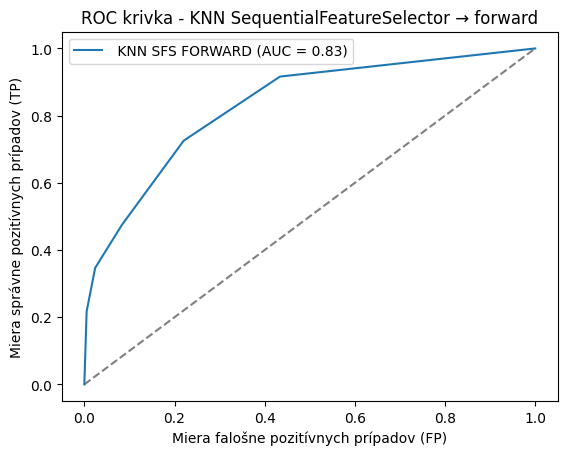

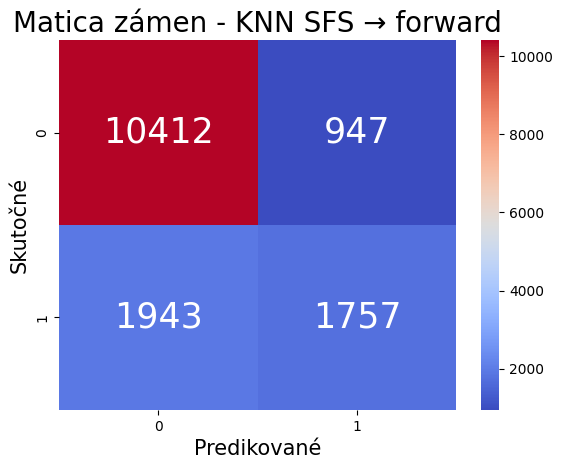

*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre KNN: ***

Index(['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital',
       'workclass_encoded', 'education_encoded', 'marital_status_encoded',
       'occupation_encoded', 'relationship_encoded', 'sex_encoded',
       'native_country_encoded'],
      dtype='object')

*** KNN po SequentialFeatureSelector → backward ***

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     11359
           1       0.65      0.55      0.60      3700

    accuracy                           0.82     15059
   macro avg       0.75      0.73      0.74     15059
weighted avg       0.81      0.82      0.81     15059



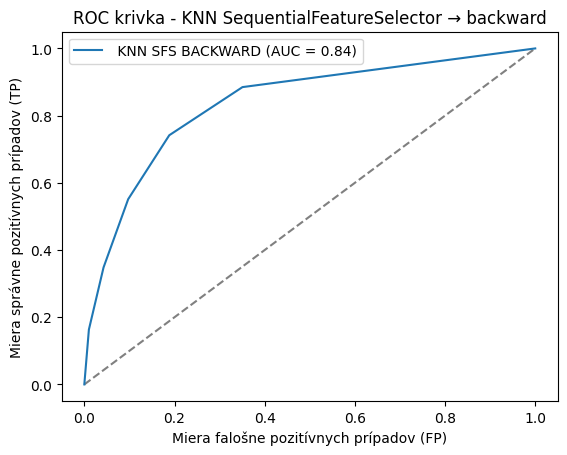

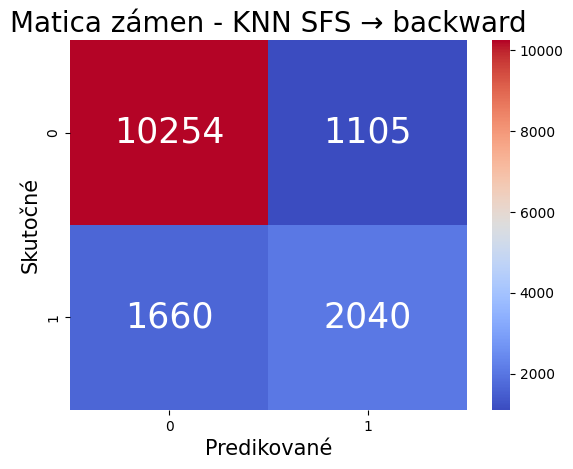

In [ ]:
# KNN SEQUENTIAL FEATURE SELECTOR FORWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_f_knn = SequentialFeatureSelector(knn, n_features_to_select="auto",tol=0.01, direction="forward", scoring="roc_auc")
sfs_f_knn.fit(X_train, y_train)
vybrane_atributy_sfs_f_knn = X_train.columns[sfs_f_knn.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre KNN: ***")
print("")
print(vybrane_atributy_sfs_f_knn)
X_train_sfs_f_knn = X_train[vybrane_atributy_sfs_f_knn]
X_test_sfs_f_knn = X_test[vybrane_atributy_sfs_f_knn]
knn.fit(X_train_sfs_f_knn, y_train)
predikt_sfs_f_knn = knn.predict(X_test_sfs_f_knn) 
print("")
print("*** KNN po SequentialFeatureSelector → forward ***")
print("")
print(classification_report(y_test, predikt_sfs_f_knn))
pravdepodobnost_triedy_sfs_f_knn = knn.predict_proba(X_test_sfs_f_knn)[:, 1]
sfs_f_knn_nespravne_pozitivne, sfs_f_knn_spravne_pozitivne, _ = roc_curve(y_test, pravdepodobnost_triedy_sfs_f_knn)
auc_skore_sfs_f_knn = metrics.auc(sfs_f_knn_nespravne_pozitivne, sfs_f_knn_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_f_knn_nespravne_pozitivne, y=sfs_f_knn_spravne_pozitivne, label=" KNN SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_knn, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - KNN SequentialFeatureSelector → forward")
plt.show()
matrix_sfs_f_lr = confusion_matrix(y_test, predikt_sfs_f_knn)
sns.heatmap(matrix_sfs_f_lr, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - KNN SFS → forward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

# KNN SEQUENTIAL FEATURE SELECTOR BACKWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_b_knn = SequentialFeatureSelector(knn, n_features_to_select="auto",tol=0.01, direction="backward", scoring="roc_auc")
sfs_b_knn.fit(X_train, y_train)
vybrane_atributy_sfs_b_knn = X_train.columns[sfs_b_knn.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre KNN: ***")
print("")
print(vybrane_atributy_sfs_b_knn)
X_train_sfs_b_knn = X_train[vybrane_atributy_sfs_b_knn]
X_test_sfs_b_knn = X_test[vybrane_atributy_sfs_b_knn]
knn.fit(X_train_sfs_b_knn, y_train)
predikt_sfs_b_knn = knn.predict(X_test_sfs_b_knn) 
print("")
print("*** KNN po SequentialFeatureSelector → backward ***")
print("")
print(classification_report(y_test, predikt_sfs_b_knn))
pravdepodobnost_triedy_sfs_b_knn = knn.predict_proba(X_test_sfs_b_knn)[:, 1]
sfs_b_knn_nespravne_pozitivne, sfs_b_knn_spravne_pozitivne, _ = roc_curve(y_test, pravdepodobnost_triedy_sfs_b_knn)
auc_skore_sfs_b_knn = metrics.auc(sfs_b_knn_nespravne_pozitivne, sfs_b_knn_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_b_knn_nespravne_pozitivne, y=sfs_b_knn_spravne_pozitivne, label=" KNN SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_knn, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - KNN SequentialFeatureSelector → backward")
plt.show()
matrix_sfs_b_knn = confusion_matrix(y_test, predikt_sfs_b_knn)
sns.heatmap(matrix_sfs_b_knn, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - KNN SFS → backward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Náhodný les: ***

Index(['education_num', 'net_capital', 'relationship_encoded'], dtype='object')

*** Náhodný les po SequentialFeatureSelector → forward ***

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11359
           1       0.73      0.50      0.60      3700

    accuracy                           0.83     15059
   macro avg       0.79      0.72      0.74     15059
weighted avg       0.82      0.83      0.82     15059



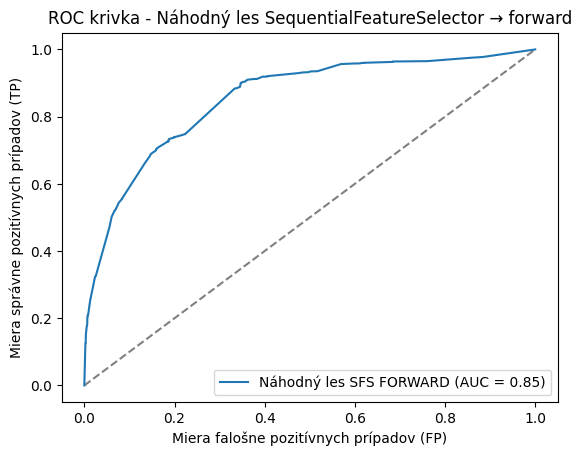

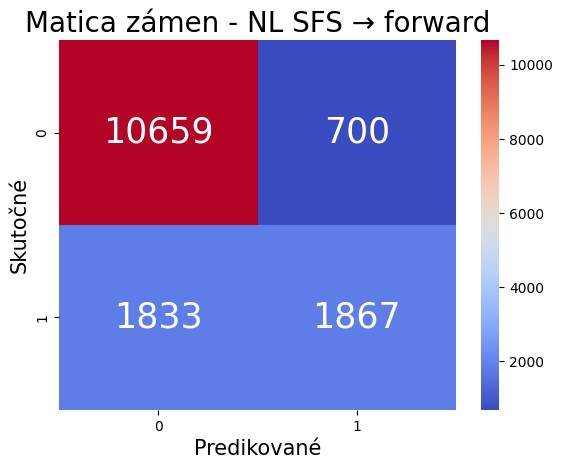

*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Náhodný les: ***

Index(['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital',
       'workclass_encoded', 'marital_status_encoded', 'occupation_encoded',
       'relationship_encoded', 'race_encoded', 'sex_encoded',
       'native_country_encoded'],
      dtype='object')

*** Náhodný les po SequentialFeatureSelector → backward ***

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     11359
           1       0.70      0.58      0.64      3700

    accuracy                           0.84     15059
   macro avg       0.79      0.75      0.77     15059
weighted avg       0.83      0.84      0.83     15059



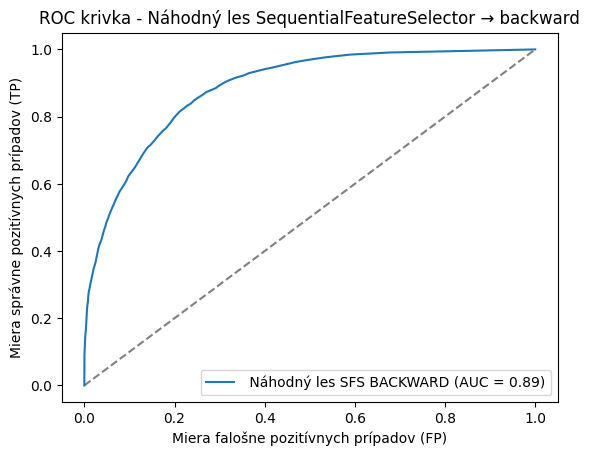

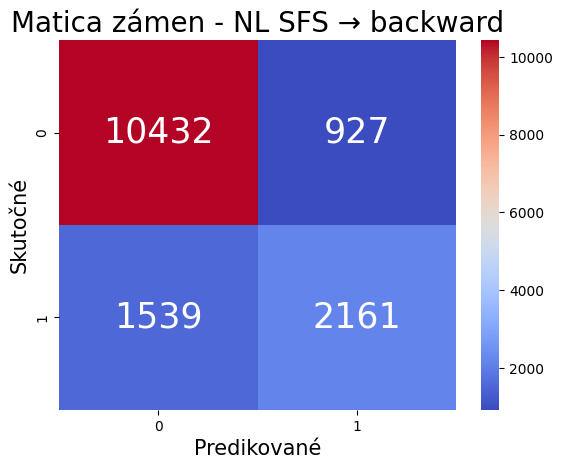

In [ ]:
# NÁHODNY LES SEQUENTIAL FEATURE SELECTOR FORWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_f_rf = SequentialFeatureSelector(rf, n_features_to_select="auto",tol=0.01, direction="forward", scoring="roc_auc")
sfs_f_rf.fit(X_train, y_train)
vybrane_atributy_sfs_f_rf = X_train.columns[sfs_f_rf.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Náhodný les: ***")
print("")
print(vybrane_atributy_sfs_f_rf)
X_train_sfs_f_rf = X_train[vybrane_atributy_sfs_f_rf]
X_test_sfs_f_rf = X_test[vybrane_atributy_sfs_f_rf]
rf.fit(X_train_sfs_f_rf, y_train)
predikt_sfs_f_rf = rf.predict(X_test_sfs_f_rf) 
print("")
print("*** Náhodný les po SequentialFeatureSelector → forward ***")
print("")
print(classification_report(y_test, predikt_sfs_f_rf))
pravdepodobnost_triedy_sfs_f_rf = rf.predict_proba(X_test_sfs_f_rf)[:, 1]
sfs_f_rf_nespravne_pozitivne, sfs_f_rf_spravne_pozitivne, _ = roc_curve(y_test, pravdepodobnost_triedy_sfs_f_rf)
auc_skore_sfs_f_rf = metrics.auc(sfs_f_rf_nespravne_pozitivne, sfs_f_rf_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_f_rf_nespravne_pozitivne, y=sfs_f_rf_spravne_pozitivne, label="Náhodný les SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_rf, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Náhodný les SequentialFeatureSelector → forward")
plt.show()
matrix_sfs_f_rf = confusion_matrix(y_test, predikt_sfs_f_rf)
sns.heatmap(matrix_sfs_f_rf, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - NL SFS → forward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

# NÁHODNY LES SEQUENTIAL FEATURE SELECTOR BACKWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_b_rf = SequentialFeatureSelector(rf, n_features_to_select="auto",tol=0.01, direction="backward", scoring="roc_auc")
sfs_b_rf.fit(X_train, y_train)
vybrane_atributy_sfs_b_rf = X_train.columns[sfs_b_rf.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Náhodný les: ***")
print("")
print(vybrane_atributy_sfs_b_rf)
X_train_sfs_b_rf = X_train[vybrane_atributy_sfs_b_rf]
X_test_sfs_b_rf = X_test[vybrane_atributy_sfs_b_rf]
rf.fit(X_train_sfs_b_rf, y_train)
predikt_sfs_b_rf = rf.predict(X_test_sfs_b_rf) 
print("")
print("*** Náhodný les po SequentialFeatureSelector → backward ***")
print("")
print(classification_report(y_test, predikt_sfs_b_rf))
pravdepodobnost_triedy_sfs_b_rf = rf.predict_proba(X_test_sfs_b_rf)[:, 1]
sfs_b_rf_nespravne_pozitivne, sfs_b_rf_spravne_pozitivne, _ = roc_curve(y_test, pravdepodobnost_triedy_sfs_b_rf)
auc_skore_sfs_b_rf = metrics.auc(sfs_b_rf_nespravne_pozitivne, sfs_b_rf_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_b_rf_nespravne_pozitivne, y=sfs_b_rf_spravne_pozitivne, label=" Náhodný les SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_rf, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Náhodný les SequentialFeatureSelector → backward")
plt.show()
matrix_sfs_b_rf = confusion_matrix(y_test, predikt_sfs_b_rf)
sns.heatmap(matrix_sfs_b_rf, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - NL SFS → backward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Rozhodovací strom: ***

Index(['education_num', 'net_capital', 'relationship_encoded'], dtype='object')

*** Rozhodovací strom po SequentialFeatureSelector → forward ***

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11359
           1       0.71      0.49      0.58      3700

    accuracy                           0.83     15059
   macro avg       0.78      0.71      0.74     15059
weighted avg       0.82      0.83      0.81     15059



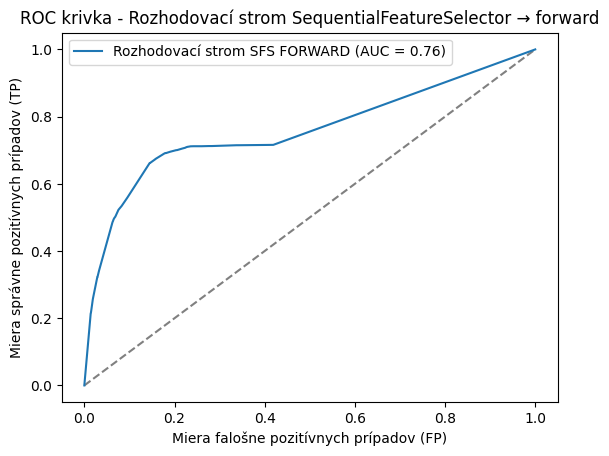

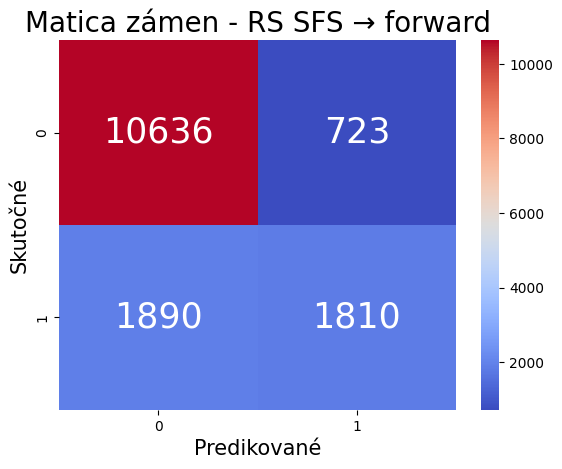

*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Rozhodovací strom: ***

Index(['education_num', 'net_capital', 'workclass_encoded',
       'education_encoded', 'marital_status_encoded', 'occupation_encoded',
       'relationship_encoded', 'race_encoded', 'sex_encoded',
       'native_country_encoded'],
      dtype='object')

*** Rozhodovací strom po SequentialFeatureSelector → backward ***

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11359
           1       0.69      0.53      0.60      3700

    accuracy                           0.83     15059
   macro avg       0.77      0.73      0.75     15059
weighted avg       0.82      0.83      0.82     15059



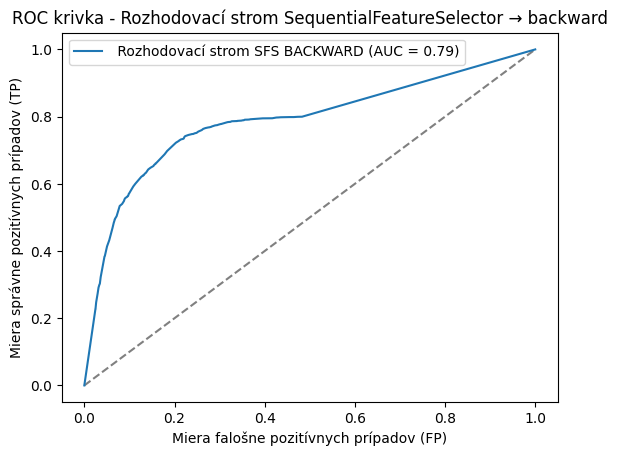

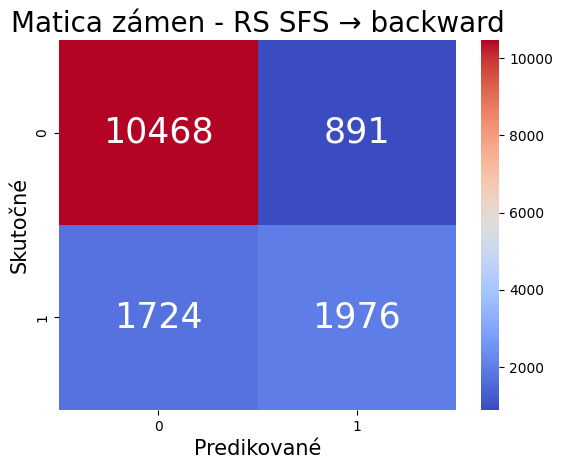

In [ ]:
# ROZHODOVACÍ STROM SEQUENTIAL FEATURE SELECTOR FORWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_f_dt = SequentialFeatureSelector(dt, n_features_to_select="auto",tol=0.01, direction="forward", scoring="roc_auc")
sfs_f_dt.fit(X_train, y_train)
vybrane_atributy_sfs_f_dt = X_train.columns[sfs_f_dt.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Rozhodovací strom: ***")
print("")
print(vybrane_atributy_sfs_f_dt)
X_train_sfs_f_dt = X_train[vybrane_atributy_sfs_f_dt]
X_test_sfs_f_dt = X_test[vybrane_atributy_sfs_f_dt]
dt.fit(X_train_sfs_f_dt, y_train)
predikt_sfs_f_dt = dt.predict(X_test_sfs_f_dt) 
print("")
print("*** Rozhodovací strom po SequentialFeatureSelector → forward ***")
print("")
print(classification_report(y_test, predikt_sfs_f_dt))
pravdepodobnost_triedy_sfs_f_dt = dt.predict_proba(X_test_sfs_f_dt)[:, 1]
sfs_f_dt_nespravne_pozitivne, sfs_f_dt_spravne_pozitivne, _ = roc_curve(y_test, pravdepodobnost_triedy_sfs_f_dt)
auc_skore_sfs_f_dt = metrics.auc(sfs_f_dt_nespravne_pozitivne, sfs_f_dt_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_f_dt_nespravne_pozitivne, y=sfs_f_dt_spravne_pozitivne, label="Rozhodovací strom SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_dt, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Rozhodovací strom SequentialFeatureSelector → forward")
plt.show()
matrix_sfs_f_dt = confusion_matrix(y_test, predikt_sfs_f_dt)
sns.heatmap(matrix_sfs_f_dt, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - RS SFS → forward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

# ROZHODOVACÍ STROM SEQUENTIAL FEATURE SELECTOR BACKWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_b_dt = SequentialFeatureSelector(dt, n_features_to_select="auto",tol=0.01, direction="backward", scoring="roc_auc")
sfs_b_dt.fit(X_train, y_train)
vybrane_atributy_sfs_b_dt = X_train.columns[sfs_b_dt.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Rozhodovací strom: ***")
print("")
print(vybrane_atributy_sfs_b_dt)
X_train_sfs_b_dt = X_train[vybrane_atributy_sfs_b_dt]
X_test_sfs_b_dt = X_test[vybrane_atributy_sfs_b_dt]
dt.fit(X_train_sfs_b_dt, y_train)
predikt_sfs_b_dt = dt.predict(X_test_sfs_b_dt) 
print("")
print("*** Rozhodovací strom po SequentialFeatureSelector → backward ***")
print("")
print(classification_report(y_test, predikt_sfs_b_dt))
pravdepodobnost_triedy_sfs_b_dt = dt.predict_proba(X_test_sfs_b_dt)[:, 1]
sfs_b_dt_nespravne_pozitivne, sfs_b_dt_spravne_pozitivne, _ = roc_curve(y_test, pravdepodobnost_triedy_sfs_b_dt)
auc_skore_sfs_b_dt = metrics.auc(sfs_b_dt_nespravne_pozitivne, sfs_b_dt_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_b_dt_nespravne_pozitivne, y=sfs_b_dt_spravne_pozitivne, label=" Rozhodovací strom SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_dt, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Rozhodovací strom SequentialFeatureSelector → backward")
plt.show()
matrix_sfs_b_dt = confusion_matrix(y_test, predikt_sfs_b_dt)
sns.heatmap(matrix_sfs_b_dt, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - RS SFS → backward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Logistickú regresiu: ***

Index(['age', 'education_num', 'hours_per_week', 'net_capital'], dtype='object')

*** Logistická regresia po SequentialFeatureSelector → forward ***

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11359
           1       0.68      0.33      0.45      3700

    accuracy                           0.80     15059
   macro avg       0.75      0.64      0.66     15059
weighted avg       0.78      0.80      0.77     15059



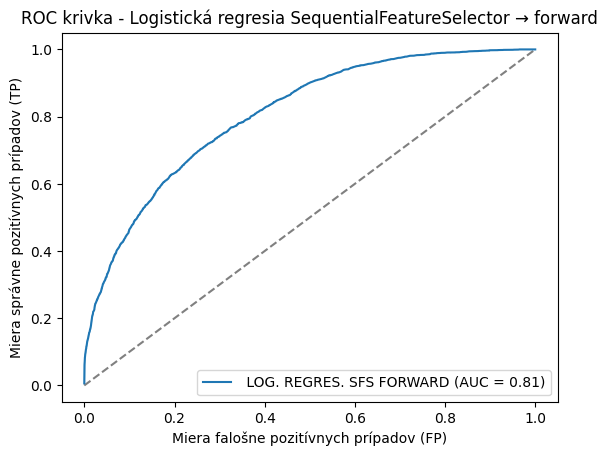

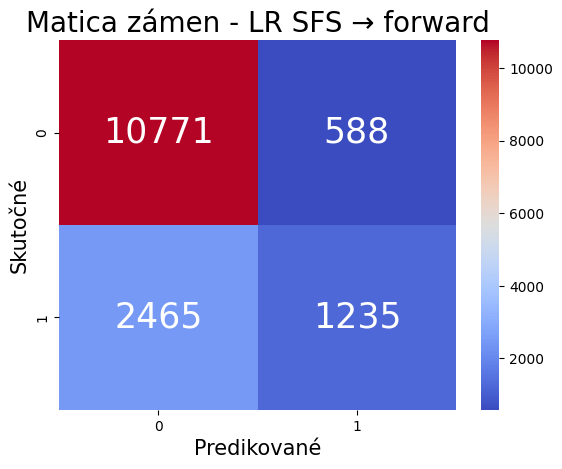

*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Logistickú regresiu: ***

Index(['age', 'education_num', 'hours_per_week', 'net_capital'], dtype='object')

*** Logistická regresia po SequentialFeatureSelector → backward ***

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11359
           1       0.68      0.33      0.45      3700

    accuracy                           0.80     15059
   macro avg       0.75      0.64      0.66     15059
weighted avg       0.78      0.80      0.77     15059



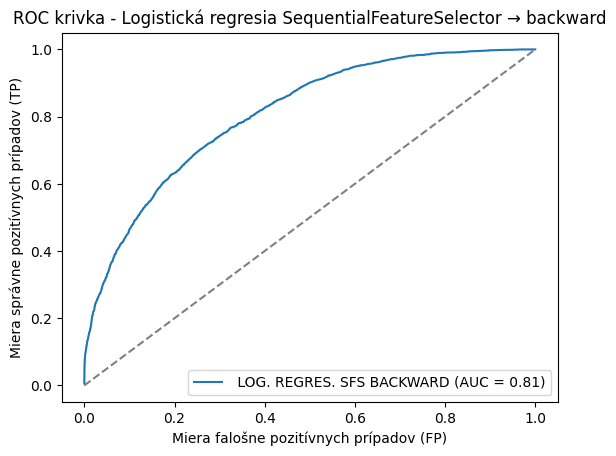

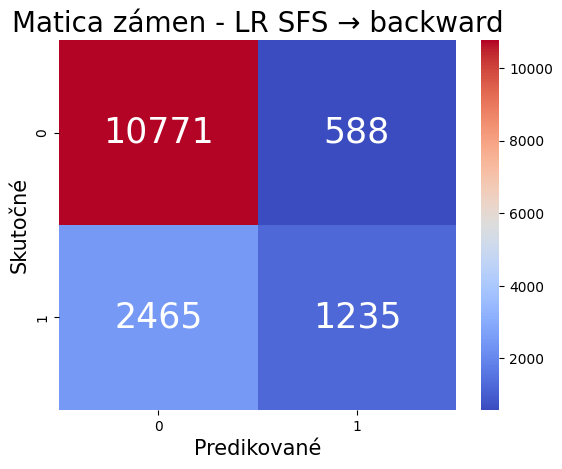

In [ ]:
# LOGISTICKA REGRESIA SEQUENTIAL FEATURE SELECTOR FORWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_f_lr = SequentialFeatureSelector(lr, n_features_to_select="auto",tol=0.01, direction="forward", scoring="roc_auc")
sfs_f_lr.fit(X_train_n, y_train_n)
vybrane_atributy_sfs_f_lr = X_train_n.columns[sfs_f_lr.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Logistickú regresiu: ***")
print("")
print(vybrane_atributy_sfs_f_lr)
X_train_sfs_f_lr = X_train_n[vybrane_atributy_sfs_f_lr]
X_test_sfs_f_lr = X_test_n[vybrane_atributy_sfs_f_lr]
lr.fit(X_train_sfs_f_lr, y_train_n)
predikt_sfs_f_lr = lr.predict(X_test_sfs_f_lr) 
print("")
print("*** Logistická regresia po SequentialFeatureSelector → forward ***")
print("")
print(classification_report(y_test_n, predikt_sfs_f_lr))
pravdepodobnost_triedy_sfs_f_lr = lr.predict_proba(X_test_sfs_f_lr)[:, 1]
sfs_f_lr_nespravne_pozitivne, sfs_f_lr_spravne_pozitivne, _ = roc_curve(y_test_n, pravdepodobnost_triedy_sfs_f_lr)
auc_skore_sfs_f_lr = metrics.auc(sfs_f_lr_nespravne_pozitivne, sfs_f_lr_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_f_lr_nespravne_pozitivne, y=sfs_f_lr_spravne_pozitivne, label=" LOG. REGRES. SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_lr, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Logistická regresia SequentialFeatureSelector → forward")
plt.show()
matrix_sfs_f_lr = confusion_matrix(y_test_n, predikt_sfs_f_lr)
sns.heatmap(matrix_sfs_f_lr, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - LR SFS → forward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

# LOGISTICKA REGRESIA SEQUENTIAL FEATURE SELECTOR BACKWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_b_lr = SequentialFeatureSelector(lr, n_features_to_select="auto",tol=0.01, direction="backward", scoring="roc_auc")
sfs_b_lr.fit(X_train_n, y_train_n)
vybrane_atributy_sfs_b_lr = X_train_n.columns[sfs_b_lr.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Logistickú regresiu: ***")
print("")
print(vybrane_atributy_sfs_b_lr)
X_train_sfs_b_lr = X_train_n[vybrane_atributy_sfs_b_lr]
X_test_sfs_b_lr = X_test_n[vybrane_atributy_sfs_b_lr]
lr.fit(X_train_sfs_b_lr, y_train_n)
predikt_sfs_b_lr = lr.predict(X_test_sfs_b_lr) 
print("")
print("*** Logistická regresia po SequentialFeatureSelector → backward ***")
print("")
print(classification_report(y_test_n, predikt_sfs_b_lr))
pravdepodobnost_triedy_sfs_b_lr = lr.predict_proba(X_test_sfs_b_lr)[:, 1]
sfs_b_lr_nespravne_pozitivne, sfs_b_lr_spravne_pozitivne, _ = roc_curve(y_test_n, pravdepodobnost_triedy_sfs_b_lr)
auc_skore_sfs_b_lr = metrics.auc(sfs_b_lr_nespravne_pozitivne, sfs_b_lr_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_b_lr_nespravne_pozitivne, y=sfs_b_lr_spravne_pozitivne, label=" LOG. REGRES. SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_lr, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Logistická regresia SequentialFeatureSelector → backward")
plt.show()
matrix_sfs_b_lr = confusion_matrix(y_test_n, predikt_sfs_b_lr)
sns.heatmap(matrix_sfs_b_lr, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - LR SFS → backward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Naivný Bayes: ***

Index(['age', 'education_num', 'hours_per_week', 'net_capital'], dtype='object')

*** Naivný Bayes po SequentialFeatureSelector → forward ***

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11359
           1       0.77      0.26      0.39      3700

    accuracy                           0.80     15059
   macro avg       0.79      0.62      0.64     15059
weighted avg       0.79      0.80      0.76     15059



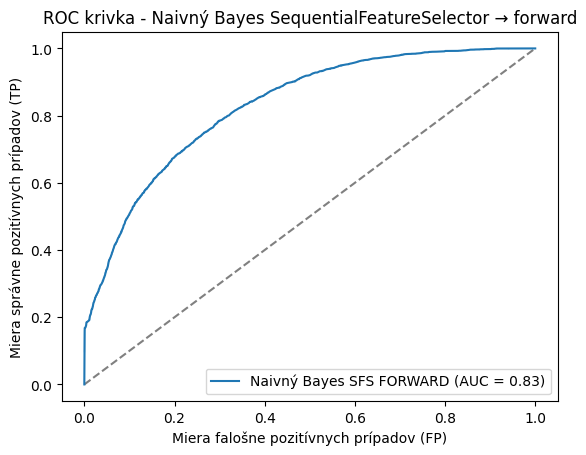

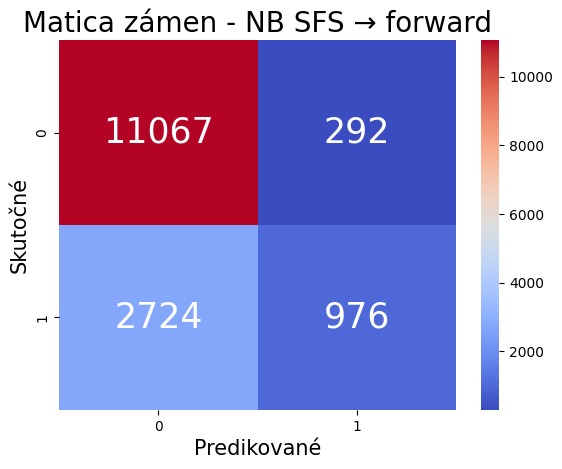

*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Naivný Bayes: ***

Index(['age', 'education_num', 'hours_per_week', 'net_capital'], dtype='object')

*** Naivný Bayes po SequentialFeatureSelector → backward ***

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11359
           1       0.77      0.26      0.39      3700

    accuracy                           0.80     15059
   macro avg       0.79      0.62      0.64     15059
weighted avg       0.79      0.80      0.76     15059



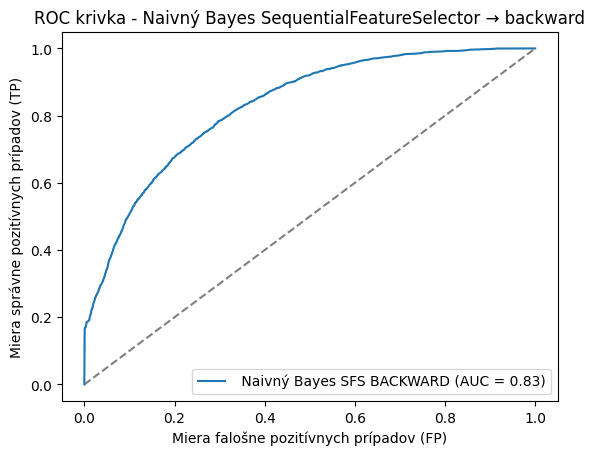

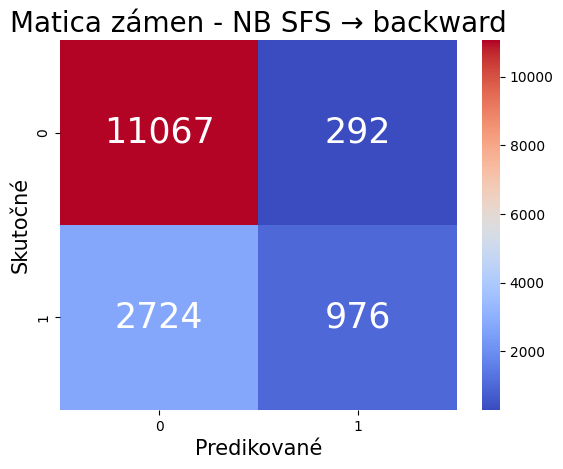

In [ ]:
# NAIVNY BAYES SEQUENTIAL FEATURE SELECTOR FORWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_f_nb = SequentialFeatureSelector(nb, n_features_to_select="auto",tol=0.01, direction="forward", scoring="roc_auc")
sfs_f_nb.fit(X_train_n, y_train_n)
vybrane_atributy_sfs_f_nb = X_train_n.columns[sfs_f_nb.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → forward pre Naivný Bayes: ***")
print("")
print(vybrane_atributy_sfs_f_nb)
X_train_sfs_f_nb = X_train_n[vybrane_atributy_sfs_f_nb]
X_test_sfs_f_nb = X_test_n[vybrane_atributy_sfs_f_nb]
nb.fit(X_train_sfs_f_nb, y_train_n)
predikt_sfs_f_nb = nb.predict(X_test_sfs_f_nb) 
print("")
print("*** Naivný Bayes po SequentialFeatureSelector → forward ***")
print("")
print(classification_report(y_test_n, predikt_sfs_f_nb))
pravdepodobnost_triedy_sfs_f_nb = nb.predict_proba(X_test_sfs_f_nb)[:, 1]
sfs_f_nb_nespravne_pozitivne, sfs_f_nb_spravne_pozitivne, _ = roc_curve(y_test_n, pravdepodobnost_triedy_sfs_f_nb)
auc_skore_sfs_f_nb = metrics.auc(sfs_f_nb_nespravne_pozitivne, sfs_f_nb_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_f_nb_nespravne_pozitivne, y=sfs_f_nb_spravne_pozitivne, label="Naivný Bayes SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_nb, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Naivný Bayes SequentialFeatureSelector → forward")
plt.show()
matrix_sfs_f_nb = confusion_matrix(y_test_n, predikt_sfs_f_nb)
sns.heatmap(matrix_sfs_f_nb, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - NB SFS → forward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

# NAIVNY BAYES SEQUENTIAL FEATURE SELECTOR BACKWARD

from sklearn.feature_selection import SequentialFeatureSelector

sfs_b_nb = SequentialFeatureSelector(nb, n_features_to_select="auto",tol=0.01, direction="backward", scoring="roc_auc")
sfs_b_nb.fit(X_train_n, y_train_n)
vybrane_atributy_sfs_b_nb = X_train_n.columns[sfs_b_nb.get_support()]
print("*** Vybrané atribúty pomocou SequentialFeatureSelector → backward pre Naivný Bayes: ***")
print("")
print(vybrane_atributy_sfs_b_nb)
X_train_sfs_b_nb = X_train_n[vybrane_atributy_sfs_b_nb]
X_test_sfs_b_nb = X_test_n[vybrane_atributy_sfs_b_nb]
nb.fit(X_train_sfs_b_nb, y_train_n)
predikt_sfs_b_nb = nb.predict(X_test_sfs_b_nb) 
print("")
print("*** Naivný Bayes po SequentialFeatureSelector → backward ***")
print("")
print(classification_report(y_test_n, predikt_sfs_b_nb))
pravdepodobnost_triedy_sfs_b_nb = nb.predict_proba(X_test_sfs_b_nb)[:, 1]
sfs_b_nb_nespravne_pozitivne, sfs_b_nb_spravne_pozitivne, _ = roc_curve(y_test_n, pravdepodobnost_triedy_sfs_b_nb)
auc_skore_sfs_b_nb = metrics.auc(sfs_b_nb_nespravne_pozitivne, sfs_b_nb_spravne_pozitivne)
plt.figure()
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
sns.lineplot(x=sfs_b_nb_nespravne_pozitivne, y=sfs_b_nb_spravne_pozitivne, label=" Naivný Bayes SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_nb, 2)) + ")")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - Naivný Bayes SequentialFeatureSelector → backward")
plt.show()
matrix_sfs_b_nb = confusion_matrix(y_test_n, predikt_sfs_b_nb)
sns.heatmap(matrix_sfs_b_nb, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size" : 25})
plt.title("Matica zámen - NB SFS → backward", fontsize = 20)
plt.xlabel("Predikované", fontsize = 15)
plt.ylabel("Skutočné", fontsize = 15)
plt.show()

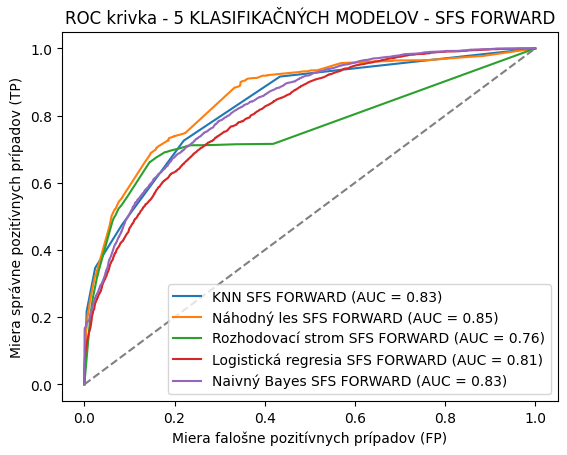

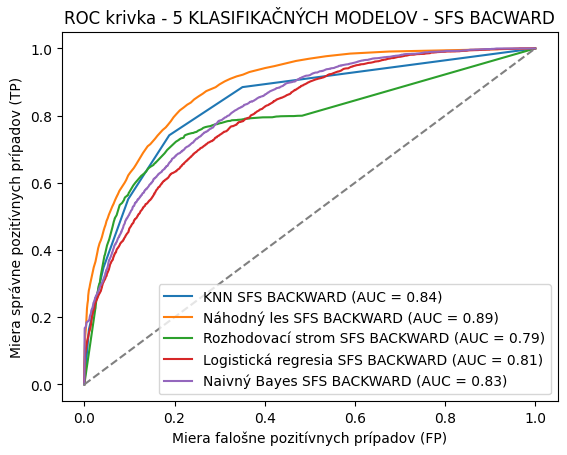

In [147]:
# MODELY SPOLU SFS FORWARD

sns.lineplot(x=sfs_f_knn_nespravne_pozitivne, y=sfs_f_knn_spravne_pozitivne, label="KNN SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_knn, 2)) + ")")
sns.lineplot(x=sfs_f_rf_nespravne_pozitivne, y=sfs_f_rf_spravne_pozitivne, label="Náhodný les SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_rf, 2)) + ")")
sns.lineplot(x=sfs_f_dt_nespravne_pozitivne, y=sfs_f_dt_spravne_pozitivne, label="Rozhodovací strom SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_dt, 2)) + ")")
sns.lineplot(x=sfs_f_lr_nespravne_pozitivne, y=sfs_f_lr_spravne_pozitivne, label="Logistická regresia SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_lr, 2)) + ")")
sns.lineplot(x=sfs_f_nb_nespravne_pozitivne, y=sfs_f_nb_spravne_pozitivne, label="Naivný Bayes SFS FORWARD (AUC = " + str(round(auc_skore_sfs_f_nb, 2)) + ")")
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - 5 KLASIFIKAČNÝCH MODELOV - SFS FORWARD")
plt.show()


# MODELY SPOLU SFS BACWARD

sns.lineplot(x=sfs_b_knn_nespravne_pozitivne, y=sfs_b_knn_spravne_pozitivne, label="KNN SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_knn, 2)) + ")")
sns.lineplot(x=sfs_b_rf_nespravne_pozitivne, y=sfs_b_rf_spravne_pozitivne, label="Náhodný les SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_rf, 2)) + ")")
sns.lineplot(x=sfs_b_dt_nespravne_pozitivne, y=sfs_b_dt_spravne_pozitivne, label="Rozhodovací strom SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_dt, 2)) + ")")
sns.lineplot(x=sfs_b_lr_nespravne_pozitivne, y=sfs_b_lr_spravne_pozitivne, label="Logistická regresia SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_lr, 2)) + ")")
sns.lineplot(x=sfs_b_nb_nespravne_pozitivne, y=sfs_b_nb_spravne_pozitivne, label="Naivný Bayes SFS BACKWARD (AUC = " + str(round(auc_skore_sfs_b_nb, 2)) + ")")
sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")
plt.xlabel("Miera falošne pozitívnych prípadov (FP)")
plt.ylabel("Miera správne pozitívnych prípadov (TP)")
plt.title("ROC krivka - 5 KLASIFIKAČNÝCH MODELOV - SFS BACWARD")
plt.show()

In [148]:
# vypis a vypocet poctu jednotlivych vybranych atributov pri SequentialFeatureSelector Forward

vysledny_zoznam1 = list(vybrane_atributy_sfs_f_knn) + list(vybrane_atributy_sfs_f_lr) + list(vybrane_atributy_sfs_f_nb) + list(vybrane_atributy_sfs_f_rf) + list(vybrane_atributy_sfs_f_dt)
vysledny_pocet_sfs_f = {}
for stlpec in vysledny_zoznam1:
    if stlpec in vysledny_pocet_sfs_f:
        vysledny_pocet_sfs_f[stlpec] = vysledny_pocet_sfs_f[stlpec]+1
    else:
        vysledny_pocet_sfs_f[stlpec] = 1

for stlpec, pocetnost in vysledny_pocet_sfs_f.items():
    print(f"{stlpec} → {pocetnost}")

education_num → 5
net_capital → 5
relationship_encoded → 3
age → 2
hours_per_week → 2


In [149]:
# vypis a vypocet poctu jednotlivych vybranych atributov pri SequentialFeatureSelector Backward

vysledny_zoznam2 = list(vybrane_atributy_sfs_b_knn) + list(vybrane_atributy_sfs_b_lr) + list(vybrane_atributy_sfs_b_nb) + list(vybrane_atributy_sfs_b_rf) + list(vybrane_atributy_sfs_b_dt)
vysledny_pocet_sfs_b = {}
for stlpec in vysledny_zoznam2:
    if stlpec in vysledny_pocet_sfs_b:
        vysledny_pocet_sfs_b[stlpec] = vysledny_pocet_sfs_b[stlpec]+1
    else:
        vysledny_pocet_sfs_b[stlpec] = 1

for stlpec, pocetnost in vysledny_pocet_sfs_b.items():
    print(f"{stlpec} → {pocetnost}")

age → 4
fnlwgt → 2
education_num → 5
hours_per_week → 4
net_capital → 5
workclass_encoded → 3
education_encoded → 2
marital_status_encoded → 3
occupation_encoded → 3
relationship_encoded → 3
sex_encoded → 3
native_country_encoded → 3
race_encoded → 2


In [150]:
# vypis a vypocet poctu jednotlivych vybranych atributov pri SequentialFeatureSelector

vysledny_zoznam = vysledny_zoznam1 + vysledny_zoznam2
vysledny_pocet_sfs = {}
for stlpec in vysledny_zoznam:
    if stlpec in vysledny_pocet_sfs:
        vysledny_pocet_sfs[stlpec] = vysledny_pocet_sfs[stlpec]+1
    else:
        vysledny_pocet_sfs[stlpec] = 1

for stlpec, pocetnost in vysledny_pocet_sfs.items():
    print(f"{stlpec} → {pocetnost}")

education_num → 10
net_capital → 10
relationship_encoded → 6
age → 6
hours_per_week → 6
fnlwgt → 2
workclass_encoded → 3
education_encoded → 2
marital_status_encoded → 3
occupation_encoded → 3
sex_encoded → 3
native_country_encoded → 3
race_encoded → 2


*** NASADENIE *** 

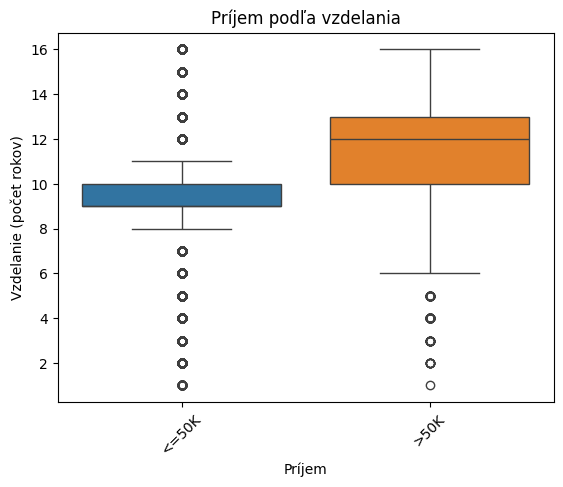

Priemerný počet rokov vzdelania pre príjem <=50K: 9.63
Priemerný počet rokov vzdelania pre príjem >50K: 11.6


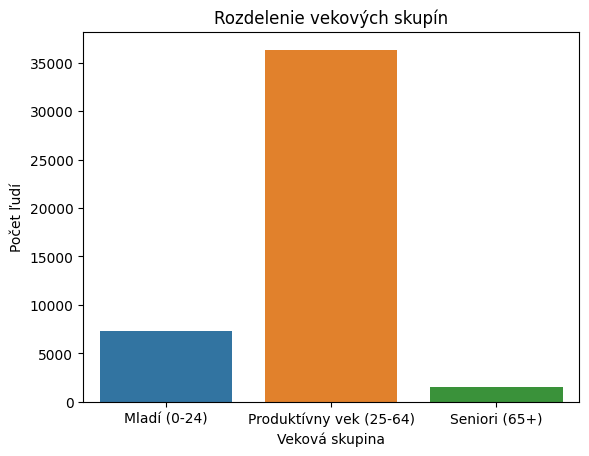

Počet hodnôt v jednotlivých triedach age_group:
age_group
Produktívny vek (25-64)    36352
Mladí (0-24)                7308
Seniori (65+)               1561
Name: count, dtype: int64
       age                age_group
11      30  Produktívny vek (25-64)
33      30  Produktívny vek (25-64)
59      30  Produktívny vek (25-64)
60      30  Produktívny vek (25-64)
88      30  Produktívny vek (25-64)
...    ...                      ...
48635   30  Produktívny vek (25-64)
48662   30  Produktívny vek (25-64)
48669   30  Produktívny vek (25-64)
48783   30  Produktívny vek (25-64)
48797   30  Produktívny vek (25-64)

[1215 rows x 2 columns]


In [ ]:
# vytvorenie noveho datasetu od zaciatku a vycistenie
nazvy_stlpcov = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
treno_data = pd.read_csv("adult.data", header=None, names=nazvy_stlpcov, skipinitialspace=True)
testo_data = pd.read_csv("adult.test", header=1, names=nazvy_stlpcov, skipinitialspace=True)
dataset_nasadenie = pd.concat([treno_data, testo_data], ignore_index=True)
dataset_nasadenie["income"] = dataset_nasadenie["income"].str.replace(".", "", regex=False)
dataset_nasadenie = dataset_nasadenie.replace("?", np.nan)
dataset_nasadenie = dataset_nasadenie.dropna()
dataset_nasadenie.columns = dataset_nasadenie.columns.str.replace("-", "_")

# graf 1 → boxplot cieloveho atributu income podla poctu rokov vzdelania
sns.boxplot(x="income", y="education_num", hue="income", data=dataset_nasadenie)
plt.title("Príjem podľa vzdelania")
plt.xlabel("Príjem")
plt.ylabel("Vzdelanie (počet rokov)")
plt.xticks(rotation=45)
plt.show()

# vypocet priemeru rokov vzdelania pre cielovy atribut prijem
avg_vzdelanie_pod_50 = dataset_nasadenie[dataset_nasadenie["income"] == "<=50K"]["education_num"].mean()
avg_vzdelanie_nad_50 = dataset_nasadenie[dataset_nasadenie["income"] == ">50K"]["education_num"].mean()
print("Priemerný počet rokov vzdelania pre príjem <=50K:", round(avg_vzdelanie_pod_50, 2))
print("Priemerný počet rokov vzdelania pre príjem >50K:", round(avg_vzdelanie_nad_50, 2))

# diskretizacia age na age_group 

# diskretizacia veku na 3 skupiny
dataset_nasadenie["age_group"] = pd.cut(dataset_nasadenie["age"], bins=[0, 24, 64, 150], labels=["Mladí (0-24)", "Produktívny vek (25-64)", "Seniori (65+)"])

# graf 2 → stlpcovy graf diskretizovanych vekovych skupin a poctu ludi
sns.countplot(x="age_group", data=dataset_nasadenie, order=["Mladí (0-24)", "Produktívny vek (25-64)", "Seniori (65+)"], hue="age_group")
plt.title("Rozdelenie vekových skupín")
plt.xlabel("Veková skupina")
plt.ylabel("Počet ľudí")
plt.show()

# zobrazenie kategorii v atribute age_group a vypis ich pocetnosti
zratana_age_group = dataset_nasadenie["age_group"].value_counts()
print("Počet hodnôt v jednotlivých triedach age_group:")
print(zratana_age_group)

print(dataset_nasadenie[dataset_nasadenie["age"] == 30][["age","age_group"]])

# odstranenie stlpca age_group
dataset_nasadenie = dataset_nasadenie.drop("age_group", axis=1)
